# Self Orginizing Map

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
import cv2

In [2]:
# nueron_lst=[]
# for i in range(100):
#     # generate two random numbers between -10000 to 10000
#     randX = random.uniform(0, 1)
#     randY = random.uniform(0, 1)
#     nueron_lst.append(np.array([randX ,randY]))
# print(nueron_lst)
nueron_lst=[]
xarr=np.arange(0,1,1/100)
yarr=np.arange(0,1,1/10)
for x in xarr:
    nueron_lst.append(np.array([x ,0.5]))

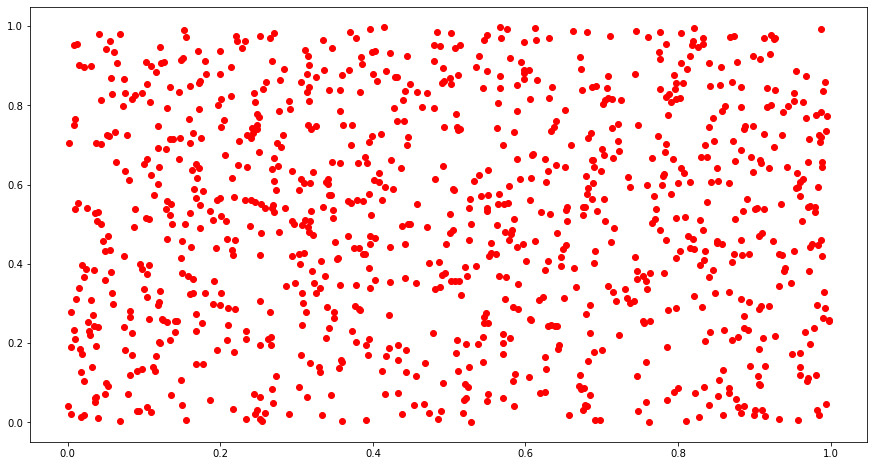

In [3]:
data=pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data[i] = [randX, randY]
data=data.T
X=[]
Y=[]
for index,row in data.iterrows():
    X.append(row[0])
    Y.append(row[1])
figure(figsize=(15, 8))
# plt.plot(X,Y)
plt.plot(X,Y,"ro")
plt.show()

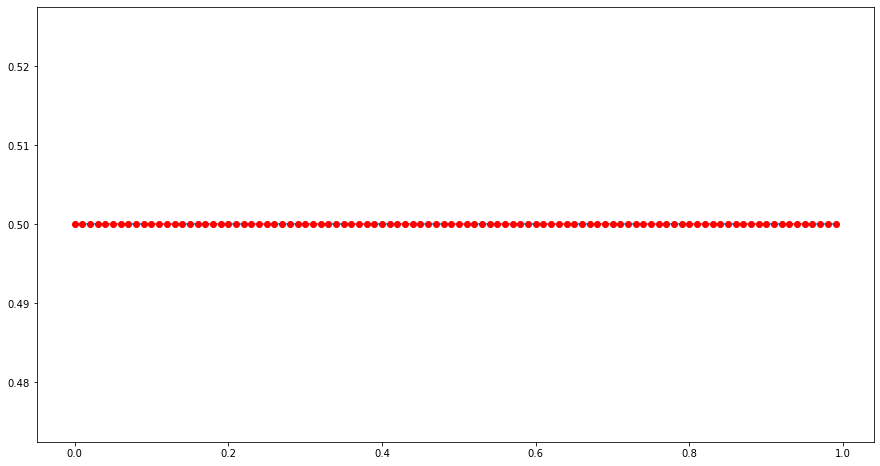

In [4]:
X=[]
Y=[]
for n in nueron_lst:
    X.append(n[0])
    Y.append(n[1])
figure(figsize=(15, 8))
plt.plot(X,Y)
plt.plot(X,Y,"ro")
plt.show()

In [5]:
def print_graph(nlist,slist):
    X=[]
    Y=[]
    for i in range(len(nlist)):
        X.append(nlist[i][0])
        Y.append(nlist[i][1])
    Xp=[]
    Yp=[]
    for n in slist:
        Xp.append(n[0])
        Yp.append(n[1])
    figure(figsize=(15, 8))
    plt.plot(Xp,Yp,'.')
    plt.plot(X,Y)
    plt.plot(X,Y,'ro')
    plt.show()

In [6]:
def SOM(data):
    sampled_points=[]
    counter=np.zeroes((100))
    alpha = 0.01
    space=1
    for i in range(10):
        space/=2
    #     if i%1000==0:
        print_graph(nueron_lst,sampled_points)
    #         alpha/=2
    #         space=space//2
    #         if space<3:
    #             space=3
    #     randX = random.uniform(0, 1)
    #     randY = random.uniform(0, 1)
    #     sampled_points.append(np.array([randX**2, randY**2]))
        # iterate threw nuerons find closest
        for index, row in data.iterrows():
            sampled_points.append(np.array([row[0], row[1]]))
            small_dist=np.inf
            spot=0
            # find closest nueron
            for n in range(len(nueron_lst)):
                dist=np.sqrt((row[0]-nueron_lst[n][0])**2+(row[1]-nueron_lst[n][1])**2)
                if dist<small_dist:
                    small_dist=dist
                    spot=n
            # update weights of nuerons
            for n in range(len(nueron_lst)):
                d= np.sqrt((nueron_lst[spot][0]-nueron_lst[n][0])**2+(nueron_lst[spot][1]-nueron_lst[n][1])**2)
                if d<=space:
                    new = nueron_lst[spot] + alpha *(sampled_points[-1]-nueron_lst[n])
                    nueron_lst[n]=new
#                     print()
#                 else:
#                     print("space=", space,"d=", d)
    #         print(spot)
    #         new = nueron_lst[spot] + alpha*(sampled_points[-1]-nueron_lst[spot])
        #     print("old=",nueron_lst[spot] )
        #     print("new=",new)
    #         nueron_lst[spot]=new
    #         for nr in range(spot+1, spot+space):
    #             if nr<100:
    #                 new = nueron_lst[nr-1]+ alpha*(sampled_points[-1]-nueron_lst[nr])  
    #                 nueron_lst[nr] = new
    #         for nl in range(spot-1, spot-space, -1):
    #             if nl>=0:
    #                 new = nueron_lst[nl+1]+ alpha*(sampled_points[-1]-nueron_lst[nl])  
    #                 nueron_lst[nl] = new

    # print(nueron_lst)

In [7]:
# SOM(data)

In [8]:
# dsquare=pd.DataFrame()
# random.seed(1)
# for i in range(1000):
#     randX = random.uniform(0, 1)
#     randY = random.uniform(0, 1)
#     dsquare[i] = [randX**2, randY**2]

# dsquare=dsquare.T
# X=[]
# Y=[]
# for index,row in dsquare.iterrows():
#     X.append(row[0])
#     Y.append(row[1])
# figure(figsize=(15, 8))
# # plt.plot(X,Y)
# plt.plot(X,Y,"ro")
# plt.show()

In [9]:
# SOM(dsquare)

In [10]:
# # Return the (g,h) index of the BMU in the grid
# def find_BMU(SOM,x):
#     distSq = (np.square(SOM - x)).sum(axis=2)
#     return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# # Update the weights of the SOM cells when given a single training example
# # and the model parameters along with BMU coordinates as a tuple
# def update_weights(SOM, train_ex, learn_rate, radius_sq, 
#                    BMU_coord, step=3):
#     g, h = BMU_coord
#     #if radius is close to zero then only BMU is changed
#     if radius_sq < 1e-3:
#         SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
#         return SOM
#     # Change all cells in a small neighborhood of BMU
#     for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
#         for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
#             dist_sq = np.square(i - g) + np.square(j - h)
#             dist_func = np.exp(-dist_sq / 2 / radius_sq)
#             SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
#     return SOM    

# # Main routine for training an SOM. It requires an initialized SOM grid
# # or a partially trained grid as parameter
# def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
#              lr_decay = .1, radius_decay = .1, epochs = 10):    
#     learn_rate_0 = learn_rate
#     radius_0 = radius_sq
#     for epoch in np.arange(0, epochs):
#         random.shuffle(train_data)      
#         for train_ex in train_data:
#             g, h = find_BMU(SOM, train_ex)
#             SOM = update_weights(SOM, train_ex, 
#                                  learn_rate, radius_sq, (g,h))
#         # Update learning rate and radius
#         learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
#         radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
#     return SOM

In [11]:
# data=pd.DataFrame()
# random.seed(1)
# for i in range(1000):
#     randX = random.uniform(0, 1)
#     randY = random.uniform(0, 1)
#     data[i] = [randX, randY]
# data=data.T
    

In [12]:
# data

In [13]:
# # https://stackabuse.com/self-organizing-maps-theory-and-implementation-in-python-with-numpy/
# # Dimensions of the SOM grid
# m = 10
# n = 10
# # Number of training examples
# n_x = 3000
# rand = np.random.RandomState(3)
# # Initialize the training data
# train_data = rand.uniform(0, 1, (n_x, 3))
# # Initialize the SOM randomly
# SOM = rand.uniform(0, 1, (n, m, 3)).astype(float)
# # Display both the training matrix and the SOM grid
# fig, ax = plt.subplots(
#     nrows=1, ncols=2, figsize=(12, 3.5), 
#     subplot_kw=dict(xticks=[], yticks=[]))
# ax[0].imshow(train_data.reshape(50, 60, 3))
# ax[0].title.set_text('Training Data')
# ax[1].imshow(SOM)
# ax[1].title.set_text('Randomly Initialized SOM Grid')

In [14]:
# fig, ax = plt.subplots(
#     nrows=1, ncols=4, figsize=(15, 3.5), 
#     subplot_kw=dict(xticks=[], yticks=[]))
# total_epochs = 0
# for epochs, i in zip([1, 4, 5, 10], range(0,4)):
#     total_epochs += epochs
#     SOM = train_SOM(SOM, train_data, epochs=epochs)
#     ax[i].imshow(SOM.astype(int))
#     ax[i].title.set_text('Epochs = ' + str(total_epochs))

In [15]:
# point=[]
# img=np.zeros((100,100))
# fig1 = plt.figure()

# def onclick_1(event):
#     x = event.xdata
#     y = event.ydata
#     print("Loc: {:.0f},{:.0f}".format(x, y))

#     plt.plot(x, y, '*r')
#     point.append([x, y])

#     if len(point) == 100:
#         plt.close()
#     plt.show()

# # display image 1
# cid = fig1.canvas.mpl_connect('button_press_event', onclick_1)
# plt.imshow(img)
# plt.show()
# point = np.array(point)

In [16]:
# # hyper parameters
# nu_zero
# tao_nu
# sigma
# tao_zero
# # definitions
# t==epoch
# i== a neuron
# j== a neuron
# I(x)= winning nueron

# learning rate = nu_zero*exp(-t/tao_nu)
# neighboorhood = exp(-dist/(2*sigma*t**2))
# sigma_t=sigma_zero*exp(-t/tao_zero)

In [17]:
# # dist=0.5
# # sigma_zero=0.9
# # tao_nu=1
# tao_zero=0.8
# nu_zero=0.5
# for i in range(10):
# #     lr=nu_zero*np.exp(-i/tao_nu)
# #     print("lr=", lr)
#     sigma_t=nu_zero*(np.exp(-i/tao_zero))
#     print("sigma_t=",sigma_t)
# #     neighboorhood = np.exp(-dist/(2*sigma_t**2))
# #     print("neighboorhood=",neighboorhood)

In [18]:
def SOM2(data,nueron_lst, sigma_zero=0.9, tao_nu=0.8, tao_zero=0.8, nu_zero=0.5):
    sampled_points=[]
    space=2
    for i in range(5):
        data.sample(frac=1)
        space/=2
        lr=nu_zero*np.exp(-i/tao_nu)
        sigma_t=sigma_zero*np.exp(-i/tao_zero)
        if sigma_t<0.001:
            sigma_t=0.001
        print("lr=",lr, " space=", space," sigma_t=",sigma_t )
        print_graph(nueron_lst,sampled_points)
        for index, row in data.iterrows():
            sampled_points.append(np.array([row[0], row[1]]))
            small_dist=np.inf
            spot=0
            # find closest nueron
            for n in range(len(nueron_lst)):
                dist=np.sqrt((row[0]-nueron_lst[n][0])**2+(row[1]-nueron_lst[n][1])**2)
                if dist<small_dist:
                    small_dist=dist
                    spot=n
            # update weights of nuerons
            for n in range(len(nueron_lst)):
                d= np.sqrt((nueron_lst[spot][0]-nueron_lst[n][0])**2+(nueron_lst[spot][1]-nueron_lst[n][1])**2)
                neighboorhood=np.exp(-dist**2/(2*sigma_t**2))
                if d<=neighboorhood:
                    new = nueron_lst[n]+ lr *(sampled_points[-1]-nueron_lst[n])
                    nueron_lst[n]=new
#                 else:>
#                     print("bigger")

In [19]:
# data1=pd.DataFrame()
# random.seed(1)
# for i in range(5000):
#     randX = random.uniform(0, 1)
#     randY = random.uniform(0, 1)
#     data1[i] = [randX**4, randY**4]
# data1=data1.T
# X=[]
# Y=[]
# for index,row in data1.iterrows():
#     X.append(row[0])
#     Y.append(row[1])
# figure(figsize=(15, 8))
# # plt.plot(X,Y)
# plt.plot(X,Y,"ro")
# plt.show()

In [20]:
# nueron_lst1=[]
# xarr=np.arange(0,1,1/100)
# yarr=np.arange(0,1,1/10)
# for x in xarr:
#     nueron_lst1.append(np.array([x ,0.5]))

In [21]:
# X=[]
# Y=[]
# for n in nueron_lst1:
#     X.append(n[0])
#     Y.append(n[1])
# figure(figsize=(15, 8))
# plt.plot(X,Y)
# plt.plot(X,Y,"ro")
# plt.show()

In [22]:
# SOM2(data1, nueron_lst1,sigma_zero=0.9, tao_nu=1, tao_zero=0.1, nu_zero=0.2)

In [23]:
# def print_graph_new(data, n_list):
#     xarr=np.arange(0,1,0.5)
#     yarr=np.arange(0,1,0.5)
#     for i in xarr:
#         for j in yarr:
#             X=[]
#             Y=[]
#             for index, row in data.iterrows():
#                 X.append(row[0])
#                 Y.append(row[1])
#             Xn=[]
#             Yn=[]
#             for n in n_list:
#                 Xn.append(n[0])
#                 Yn.append(n[1])
#             figure(figsize=(15, 8))
#             plt.plot(X,Y,'.')
#             plt.plot(Xn,Yn)
#             plt.plot(Xn,Yn,'ro')
#             plt.xlim([i, i+0.5])  
#             plt.ylim([j, j+0.5])
#             plt.show()

In [24]:
# print_graph_new(data1,nueron_lst1)

In [25]:
# print(nueron_lst1)

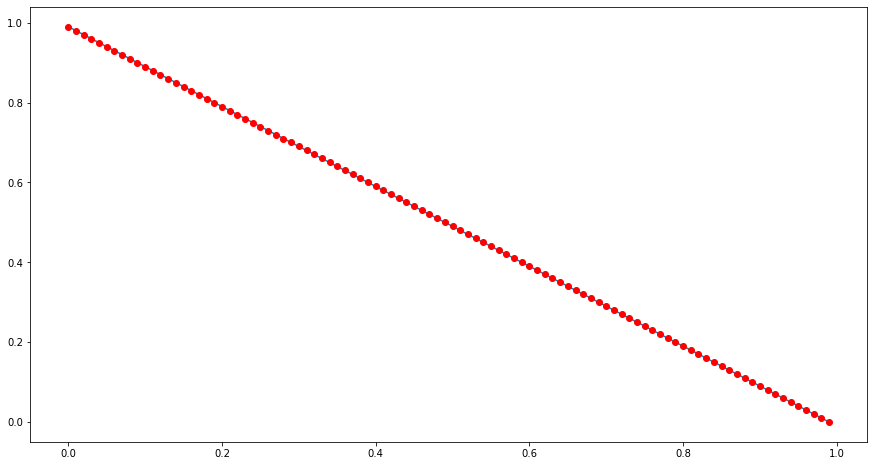

In [26]:
nueron_lst2=[]
xarr=np.arange(0,1,1/100)
yarr=np.arange(0,1,1/100)
for i in range(len(xarr)):
    nueron_lst2.append(np.array([xarr[i] ,yarr[99-i]]))
X=[]
Y=[]
for n in nueron_lst2:
    X.append(n[0])
    Y.append(n[1])
figure(figsize=(15, 8))
plt.plot(X,Y)
plt.plot(X,Y,"ro")
plt.show()
# print(nueron_lst2)

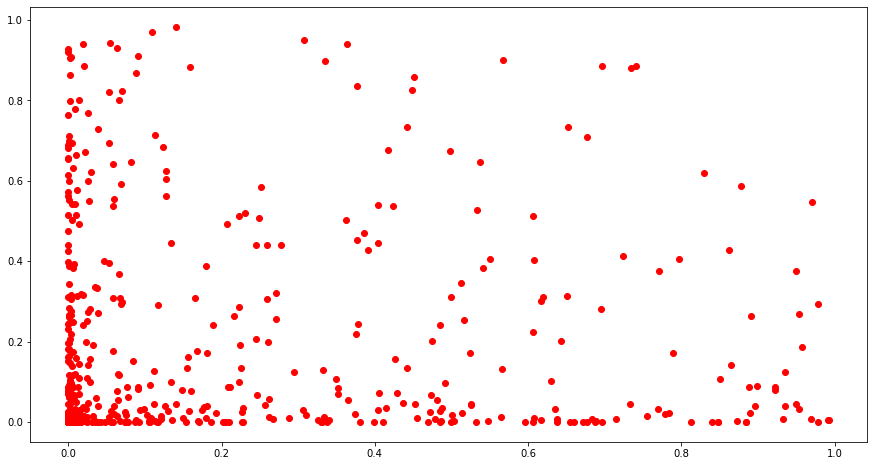

In [27]:
data3=pd.DataFrame()
random.seed(1)
for i in range(500):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data3[i] = [randX**4, randY**4]
data3=data3.T
X=[]
Y=[]
for index,row in data3.iterrows():
    X.append(row[0])
    Y.append(row[1])
figure(figsize=(15, 8))
# plt.plot(X,Y)
plt.plot(X,Y,"ro")
plt.show()

In [28]:
def SOM3(data,nueron_lst):
    ker=cv2.getGaussianKernel(21,1)
    num=11
    sampled_points=[]
    counter=np.zeros((100))
    for i in range(20):
        num-=1
        data=data.sample(frac=1)
        print(data.head())
#         ker*=0.5
        new_counter=np.zeros((100))
        print_graph(nueron_lst,sampled_points)
        for index, row in data.iterrows():
            sampled_points.append(np.array([row[0], row[1]]))
            small_dist=np.inf
            spot_lst=[]
            # find closest nueron
            
            for n in range(len(nueron_lst)):
                dist=np.sqrt((row[0]-nueron_lst[n][0])**2+(row[1]-nueron_lst[n][1])**2)
                if dist<small_dist:
                    small_dist=dist
                    spot_lst.append(n)
#             num=len(spot_lst)//2
            spot=spot_lst[len(spot_lst)//2]        
            # update weights of nuerons
            new = nueron_lst[spot]+ ker[11]*(sampled_points[-1]-nueron_lst[spot])
#             print("spot=",spot,"  old=",nueron_lst[spot], "  new=", new)
            counter[spot]=counter[spot]+1
            new_counter[spot]=new_counter[spot]+1
            nueron_lst[spot]=new
            for i in range(num):
                if spot+i<len(nueron_lst):
                    new = nueron_lst[spot]+ ker[4-i-1]*(sampled_points[-1]-nueron_lst[spot+i])
                    nueron_lst[spot+i]=new
                    counter[spot+i]=counter[spot+i]+1
                    new_counter[spot]=new_counter[spot]+1
                if spot-i <=0:
                    new = nueron_lst[spot]+ ker[4-i-1]*(sampled_points[-1]-nueron_lst[spot-i])
                    counter[spot-i]=counter[spot-1]+1
                    new_counter[spot]=new_counter[spot]+1
                    
                    nueron_lst[spot-i]=new
        print(counter)
        print(new_counter)
    print_graph(nueron_lst,sampled_points)
    print(counter)
    print(new_counter)
#             for n in range(len(nueron_lst)):
#                 d= np.sqrt((nueron_lst[spot][0]-nueron_lst[n][0])**2+(nueron_lst[spot][1]-nueron_lst[n][1])**2)
#                 neighboorhood=np.exp(-dist**2/(2*sigma_t**2))
#                 if d<=neighboorhood:
#                     new = nueron_lst[n]+ lr *(sampled_points[-1]-nueron_lst[n])
#                     nueron_lst[n]=new
# #                 else:>
# #                     print("bigger")

In [29]:
# SOM3(data3,nueron_lst2)

In [30]:
def print_graph(nlist,slist):
    figure(figsize=(15, 8))
    X=[]
    Y=[]
#     num=[]
    for i in range(len(nlist)):
        X.append(nlist[i][0])
        Y.append(nlist[i][1])
#         num.append(i)
        plt.annotate(i,(nlist[i][0],nlist[i][1]))
        plt.plot(nlist[i][0],nlist[i][1],'ro')
    Xp=[]
    Yp=[]
    for n in slist:
        Xp.append(n[0])
        Yp.append(n[1])
    plt.plot(Xp,Yp,'.')
    plt.plot(X,Y)
    plt.show()

In [62]:
def SOM5(data,nueron_lst):
    ker=cv2.getGaussianKernel(21,1)*4
    print(ker)
    mid=11
    num=10
    alpha=1
    counter=np.zeros((100))
    sampled_points=[]
    for i in range(1):
#         print("iteration ",i )
#         print_graph(nueron_lst,sampled_points)
        sampled_points=[]
        if (i%3==0): 
            ker=ker*0.75
            num-=1
        data=data.sample(frac=1)
#         print(data.head())
        new_counter=np.zeros((100))
        c=0
        for index, row in data.iterrows():
            print(row)
            sampled_points.append(np.array([row[0], row[1]]))
            small_dist=np.inf
#             spot_lst=[]
            # find closest nueron
            for n in range(len(nueron_lst)):
                dist=np.sqrt((row[0]-nueron_lst[n][0])**2+(row[1]-nueron_lst[n][1])**2)
                if dist<small_dist:
                    small_dist=dist
                    spot=n
#                     spot_lst.append(n)
#             print(spot_lst)
#             sp=random.randint(0,len(spot_lst)-1)
#             print(sp)
#             spot=spot_lst[sp]
            print(spot)
            # update weights of nuerons
            new = nueron_lst[spot]+ ker[mid]*(sampled_points[-1]-nueron_lst[spot])
            
#             new=sampled_points[-1]
            nueron_lst[spot]=new
#             print("spot=",spot,"  old=",nueron_lst[spot], "  new=", new)
#             counter[spot]=counter[spot]+1
#             new_counter[spot]=new_counter[spot]+1
            
            for i in range(1,num):
                if spot+i<len(nueron_lst):
                    new = nueron_lst[spot+i-1]+alpha*ker[mid+i]*(sampled_points[-1]-nueron_lst[spot+i])
                    nueron_lst[spot+i]=new
#                     counter[spot+i]=counter[spot+i]+1
#                     new_counter[spot]=new_counter[spot]+1
                if spot-i >=0:
                    new = nueron_lst[spot-i+1]+alpha*ker[mid-i]*(sampled_points[-1]-nueron_lst[spot-i])
                    nueron_lst[spot-i]=new
#                     counter[spot-i]=counter[spot-1]+1
#                     new_counter[spot]=new_counter[spot]+1
#             print(c)
            print_graph(nueron_lst,sampled_points)
            c+=1
#         print(counter)
#         print(new_counter)
#     print("iteration ",i )
#     print_graph(nueron_lst,sampled_points)
#     print(counter)
#     print(new_counter)

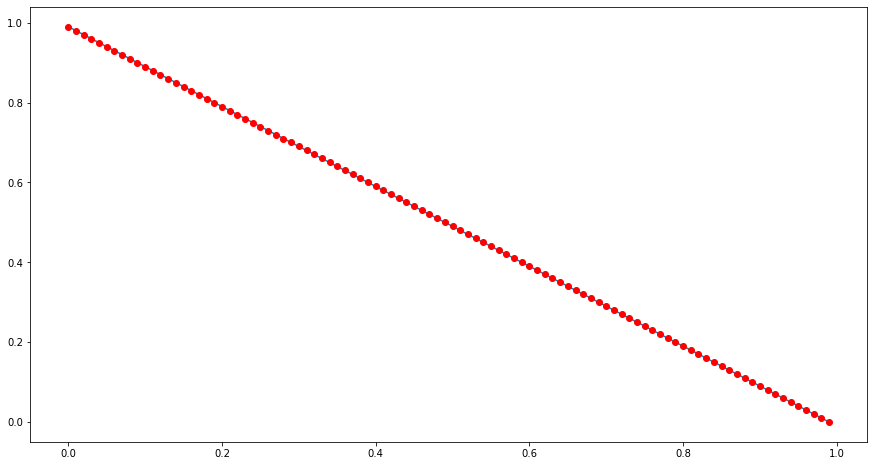

In [63]:
nueron_lst5=[]
xarr=np.arange(0,1,1/100)
yarr=np.arange(0,1,1/100)
for i in range(len(xarr)):
    nueron_lst5.append(np.array([xarr[i] ,yarr[99-i]]))
X=[]
Y=[]
for n in nueron_lst5:
    X.append(n[0])
    Y.append(n[1])
figure(figsize=(15, 8))
plt.plot(X,Y)
plt.plot(X,Y,"ro")

plt.show()
# print(nueron_lst2)

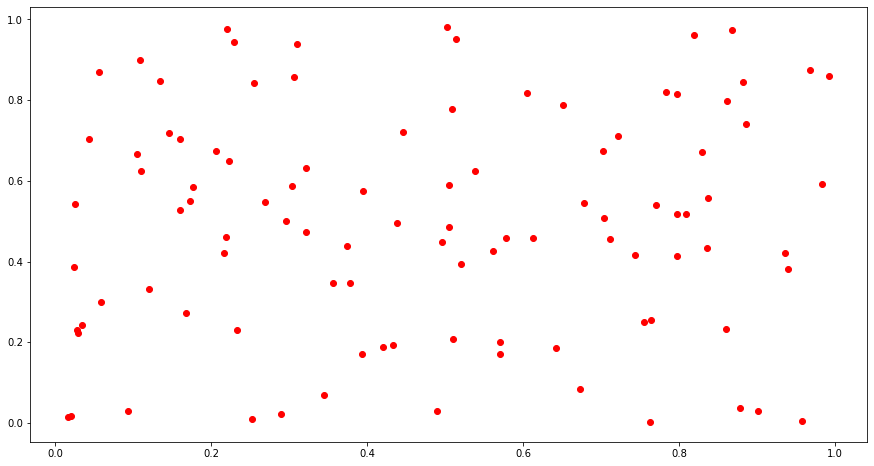

In [64]:
data5=pd.DataFrame()
random.seed(1)
for i in range(100):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data5[i] = [randX, randY]
data5=data5.T
X=[]
Y=[]
for index,row in data5.iterrows():
    X.append(row[0])
    Y.append(row[1])
figure(figsize=(15, 8))
# plt.plot(X,Y)
plt.plot(X,Y,"ro")
plt.show()

[[3.07783943e-22]
 [4.11190941e-18]
 [2.02090842e-14]
 [3.65388814e-11]
 [2.43035313e-08]
 [5.94687803e-06]
 [5.35320900e-04]
 [1.77273936e-02]
 [2.15963865e-01]
 [9.67882893e-01]
 [1.59576911e+00]
 [9.67882893e-01]
 [2.15963865e-01]
 [1.77273936e-02]
 [5.35320900e-04]
 [5.94687803e-06]
 [2.43035313e-08]
 [3.65388814e-11]
 [2.02090842e-14]
 [4.11190941e-18]
 [3.07783943e-22]]
0    0.322002
1    0.473771
Name: 69, dtype: float64
42


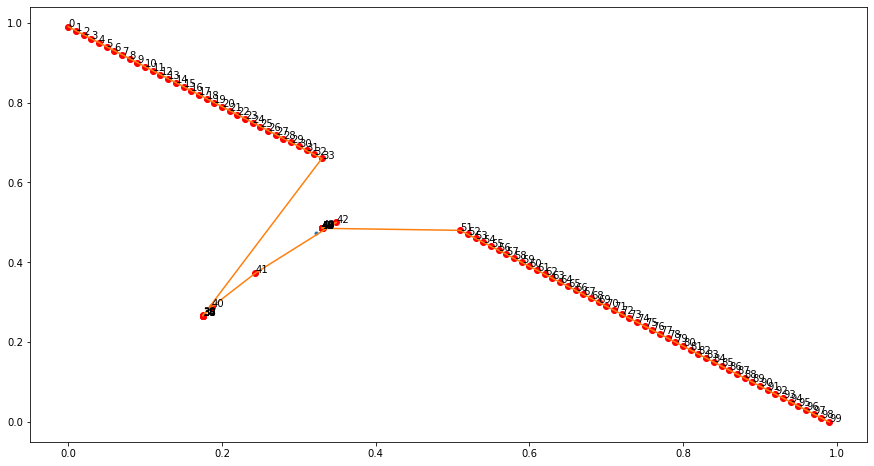

0    0.255294
1    0.841745
Name: 60, dtype: float64
20


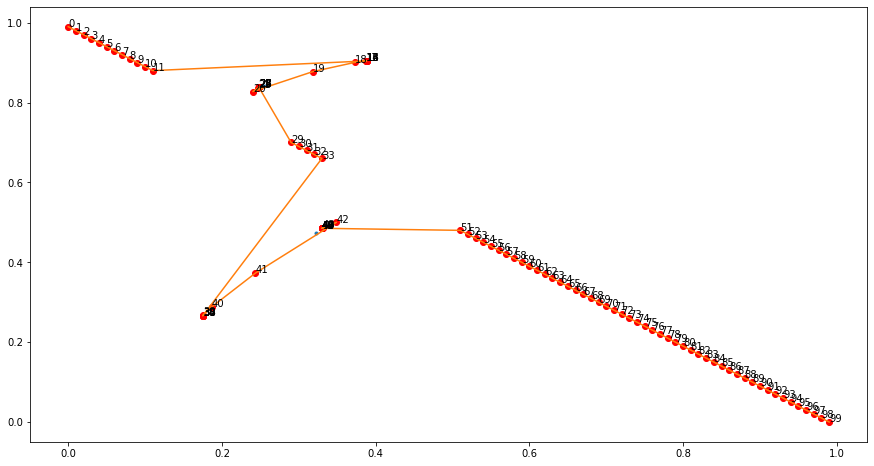

0    0.289782
1    0.021490
Name: 17, dtype: float64
34


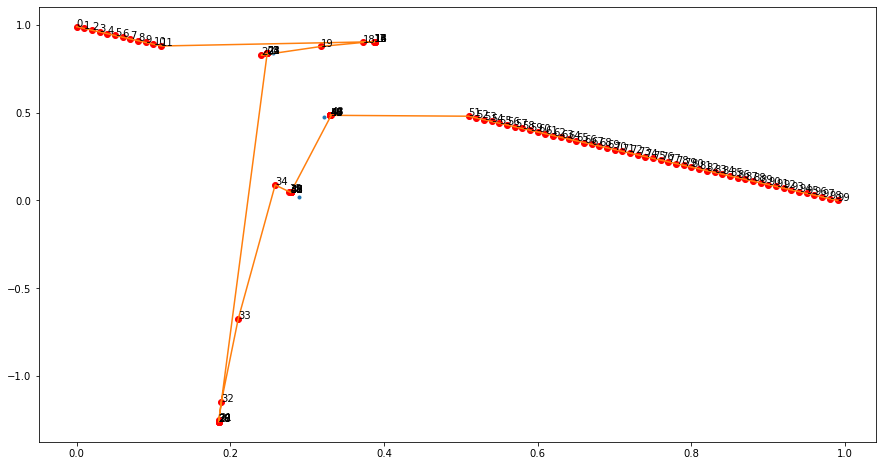

0    0.513772
1    0.952467
Name: 42, dtype: float64
12


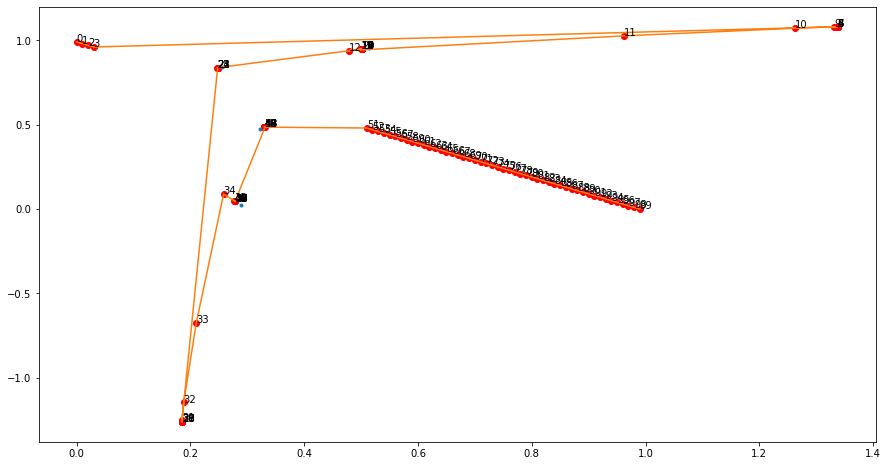

0    0.177211
1    0.584461
Name: 57, dtype: float64
49


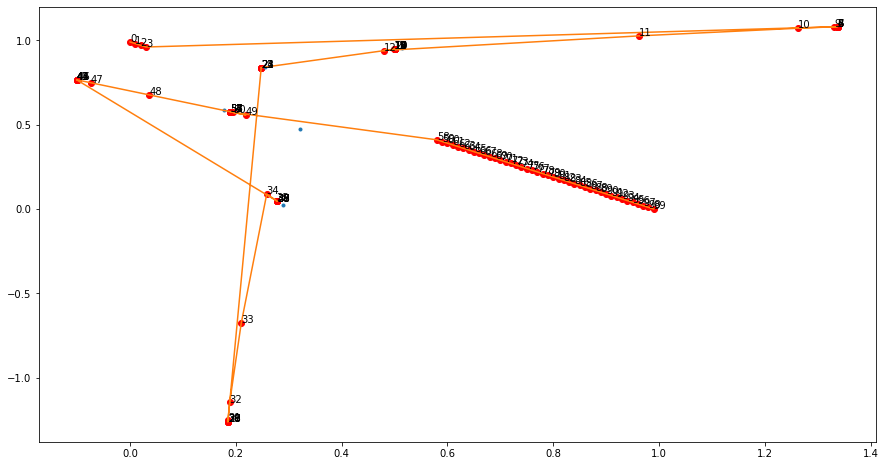

0    0.093860
1    0.028347
Name: 4, dtype: float64
34


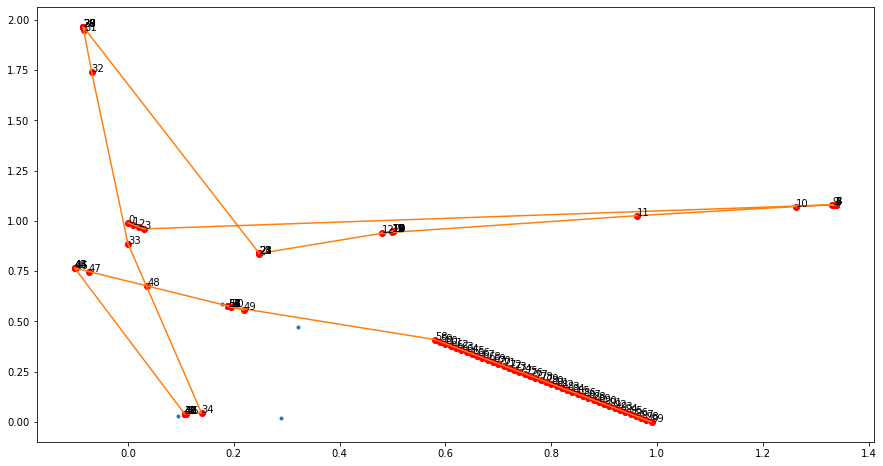

0    0.612452
1    0.458147
Name: 55, dtype: float64
58


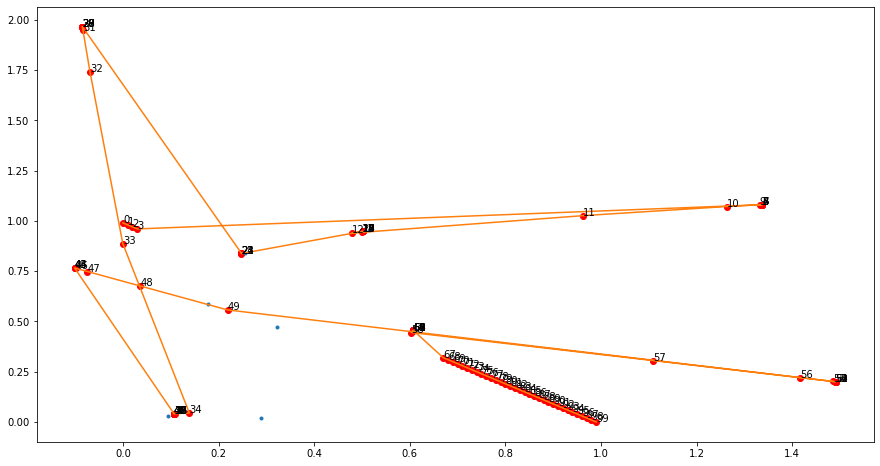

0    0.704023
1    0.508874
Name: 94, dtype: float64
65


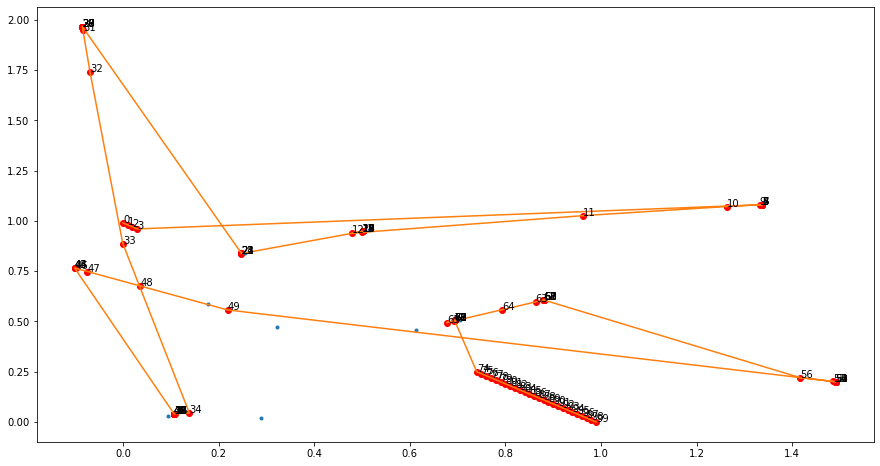

0    0.783655
1    0.820486
Name: 46, dtype: float64
57


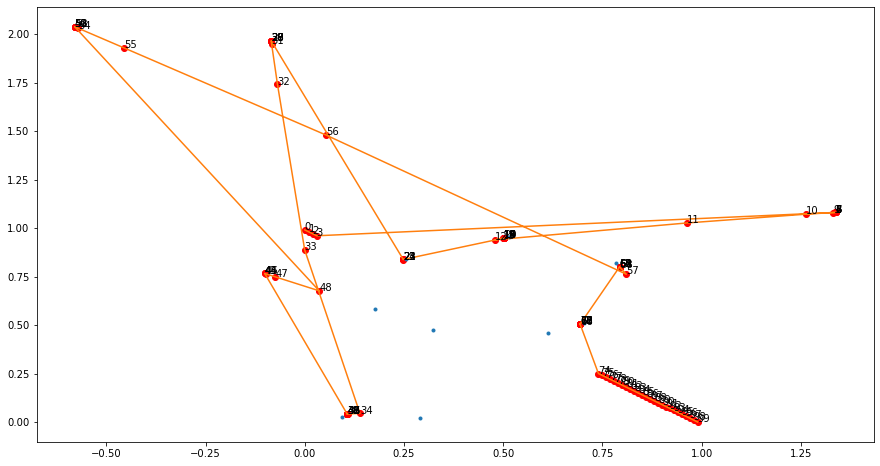

0    0.394898
1    0.575846
Name: 82, dtype: float64
21


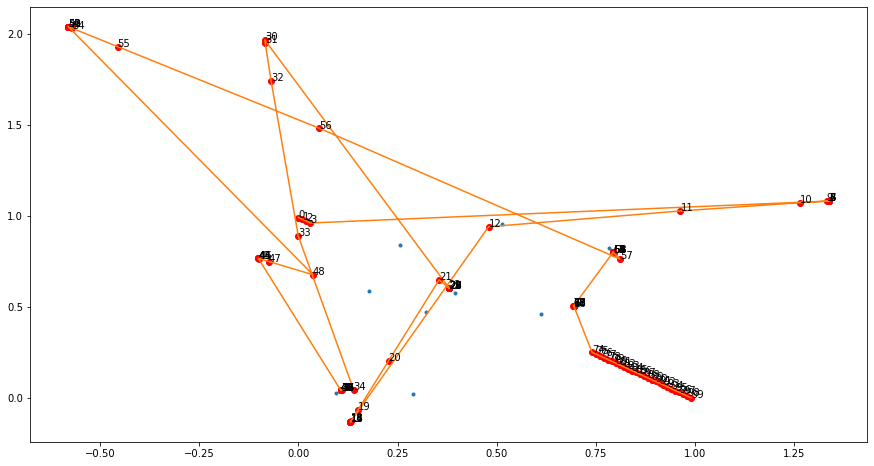

0    0.029041
1    0.221692
Name: 13, dtype: float64
40


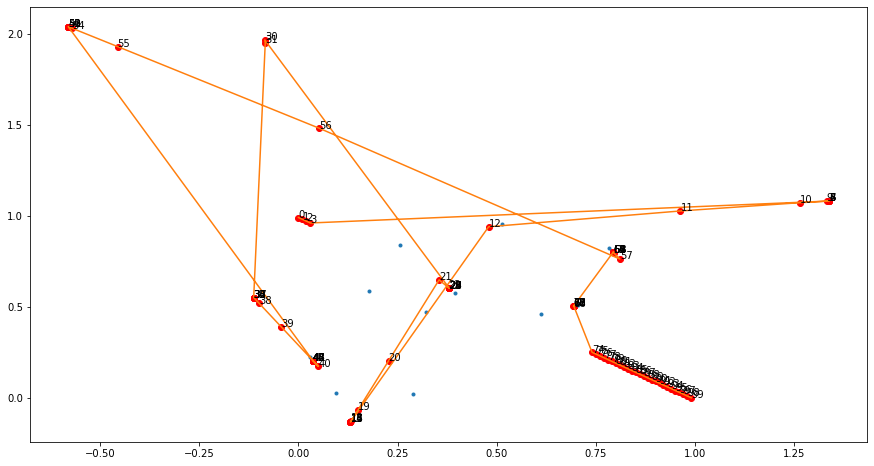

0    0.861009
1    0.798439
Name: 58, dtype: float64
57


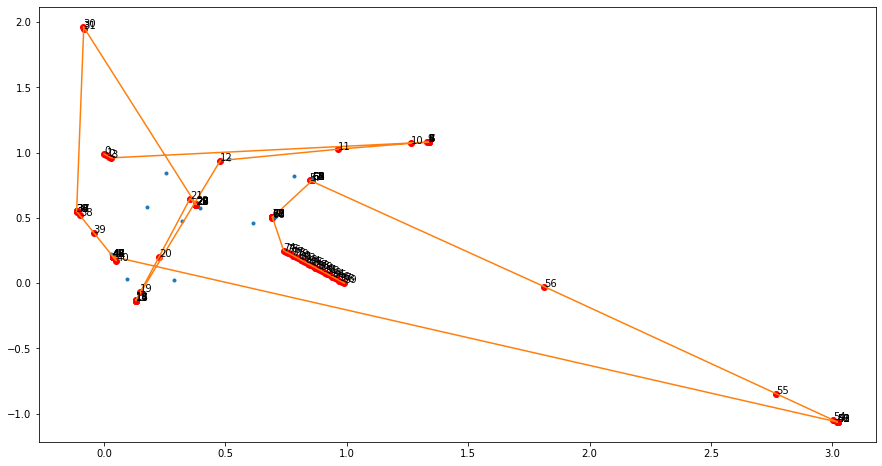

0    0.058785
1    0.298606
Name: 84, dtype: float64
42


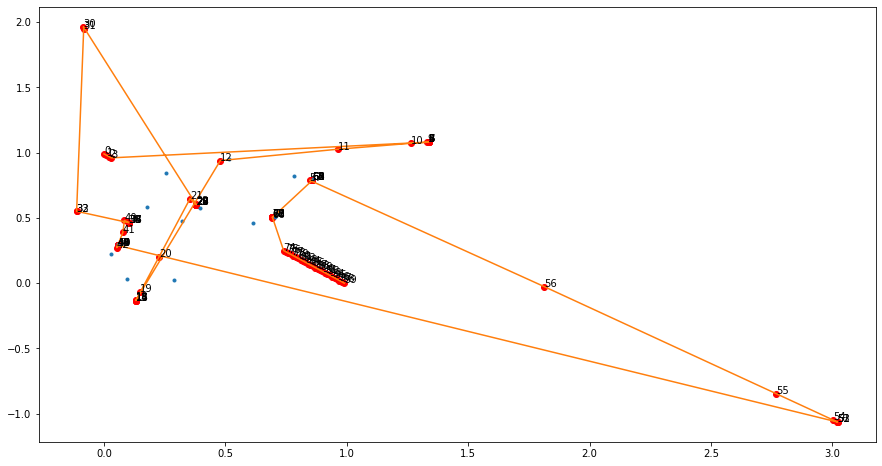

0    0.108762
1    0.899819
Name: 72, dtype: float64
3


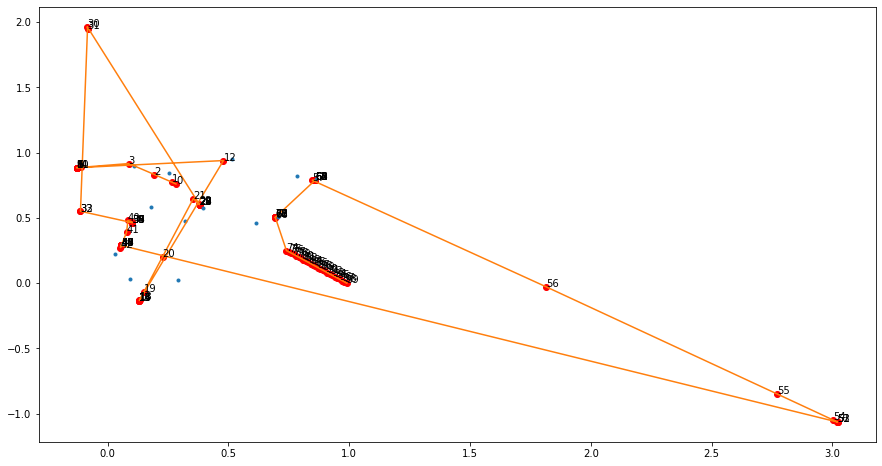

0    0.992543
1    0.859947
Name: 20, dtype: float64
64


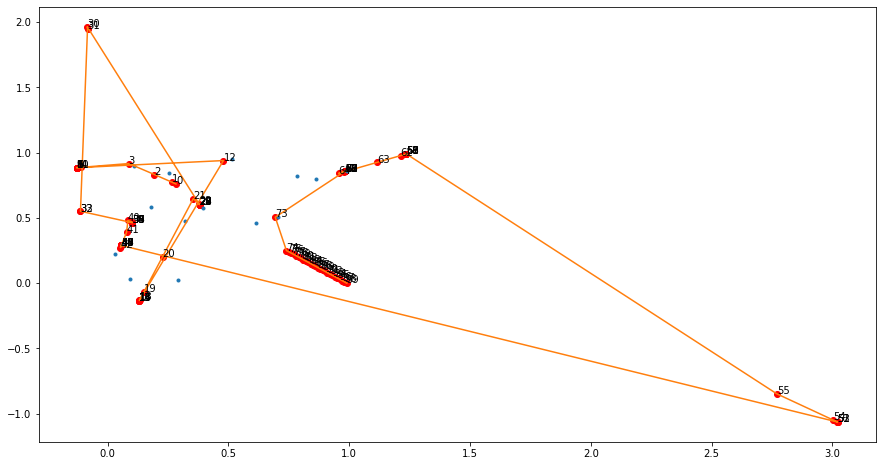

0    0.763775
1    0.255069
Name: 1, dtype: float64
75


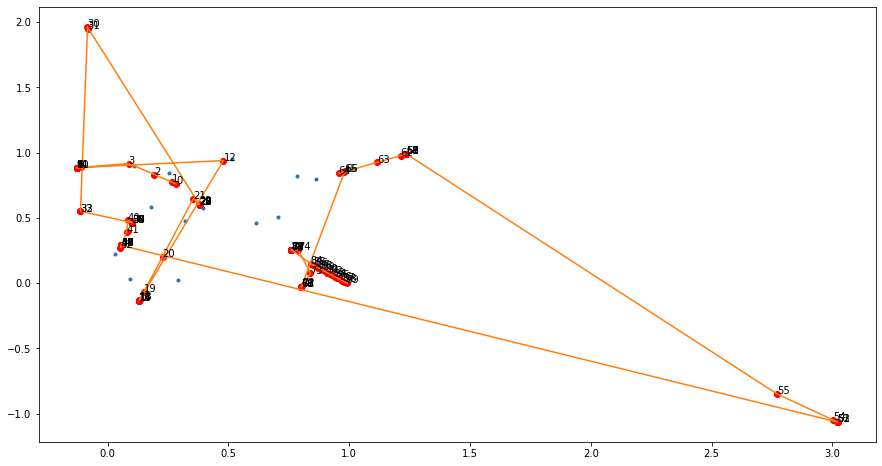

0    0.673114
1    0.083234
Name: 61, dtype: float64
73


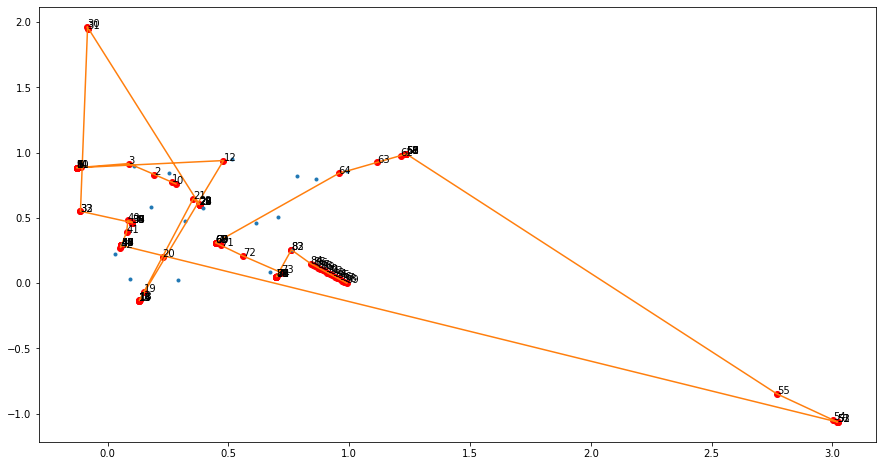

0    0.432950
1    0.194119
Name: 97, dtype: float64
71


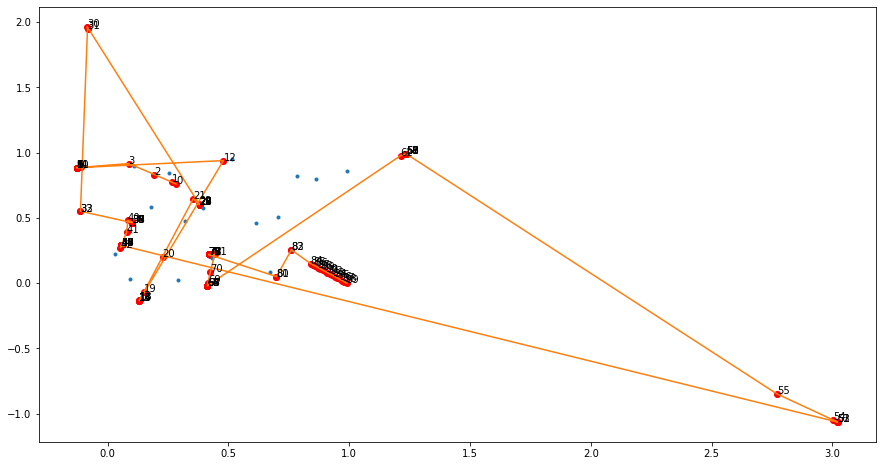

0    0.043487
1    0.703382
Name: 36, dtype: float64
2


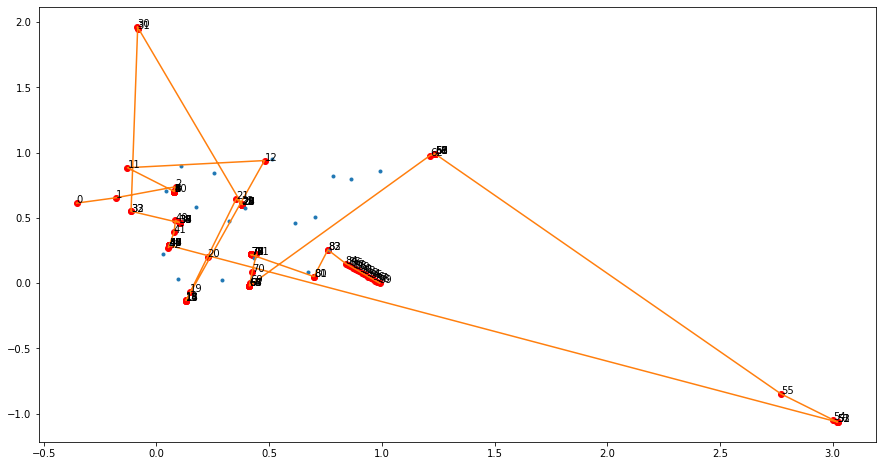

0    0.711590
1    0.454702
Name: 68, dtype: float64
82


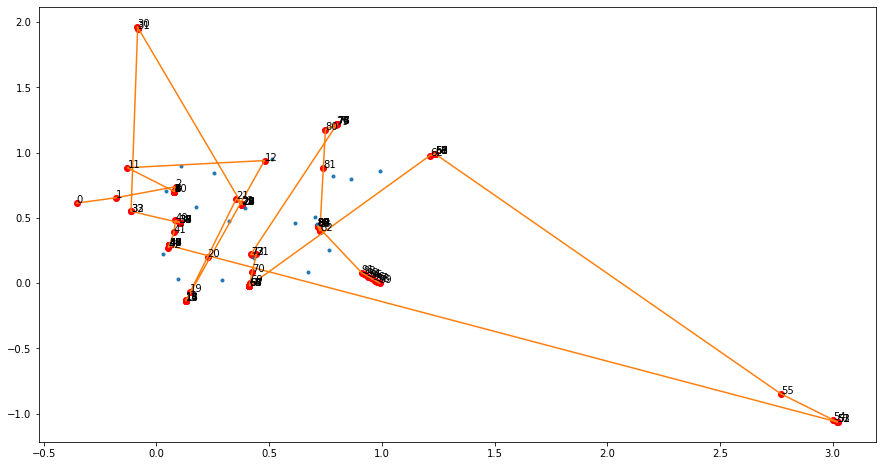

0    0.306387
1    0.858514
Name: 86, dtype: float64
12


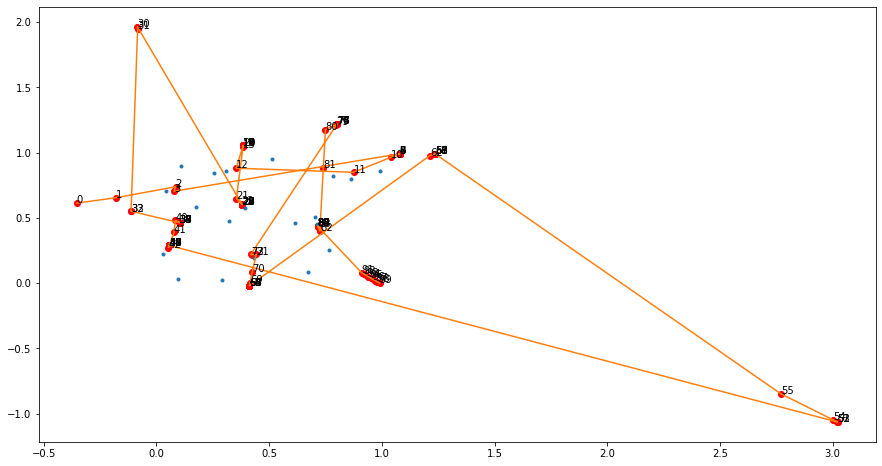

0    0.120890
1    0.332695
Name: 21, dtype: float64
41


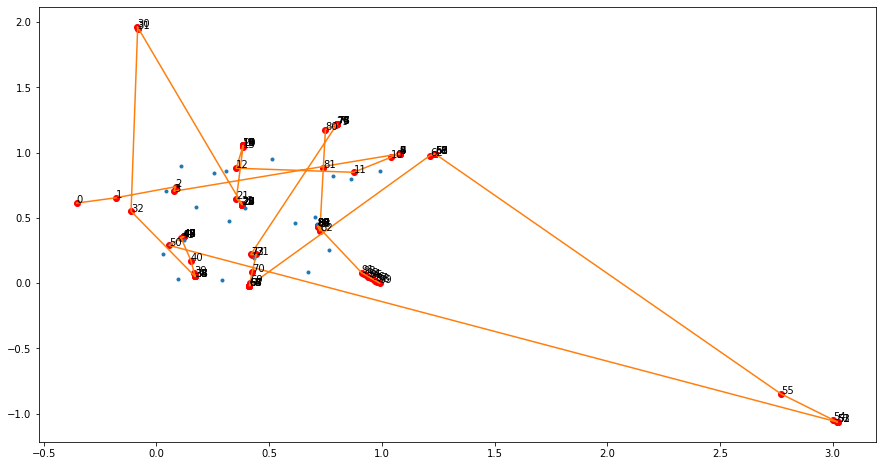

0    0.577795
1    0.459132
Name: 43, dtype: float64
89


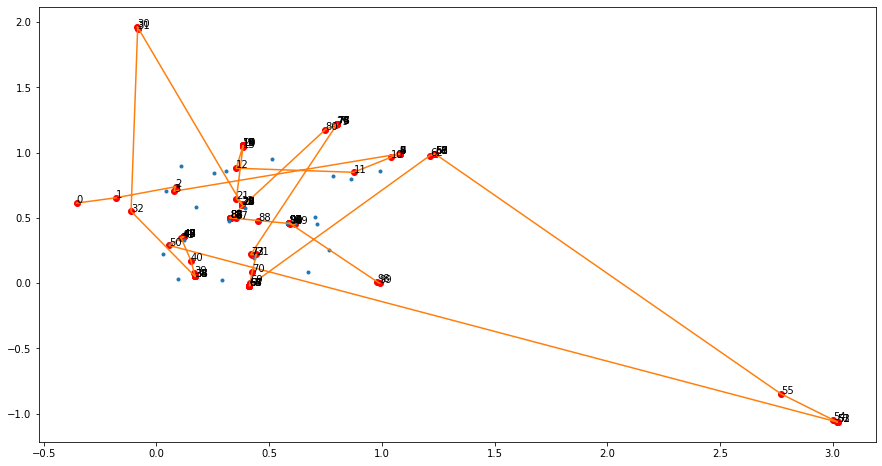

0    0.939149
1    0.381204
Name: 11, dtype: float64
89


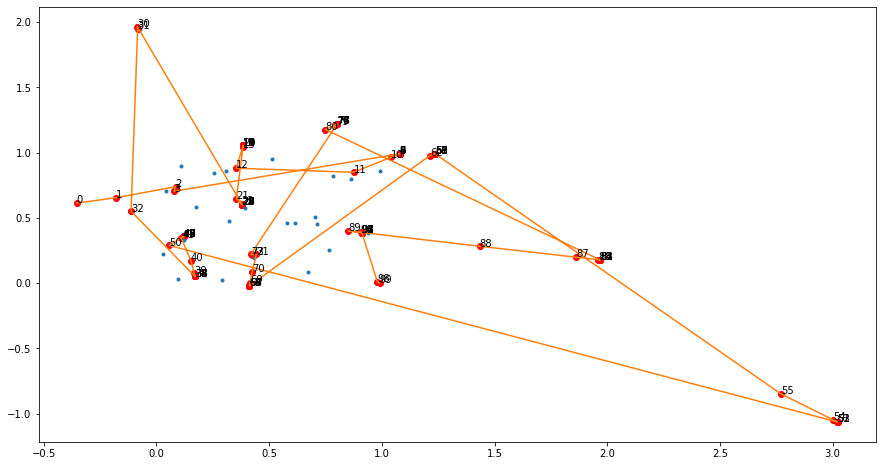

0    0.797098
1    0.816437
Name: 59, dtype: float64
11


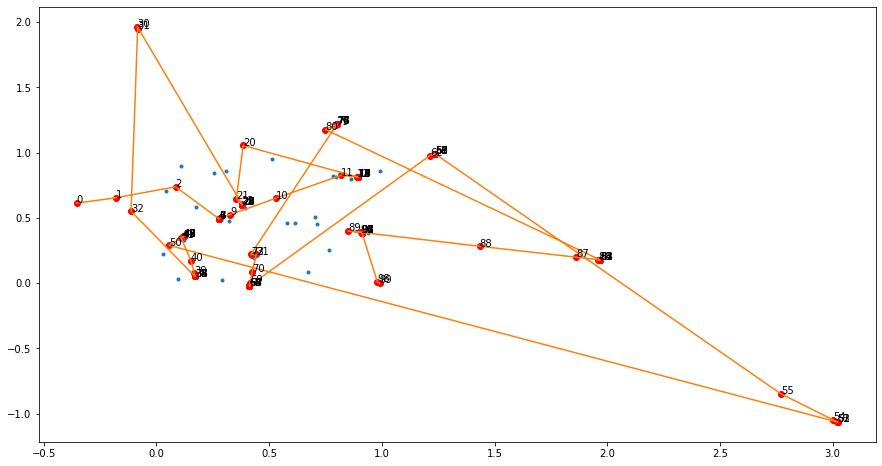

0    0.016691
1    0.014560
Name: 62, dtype: float64
34


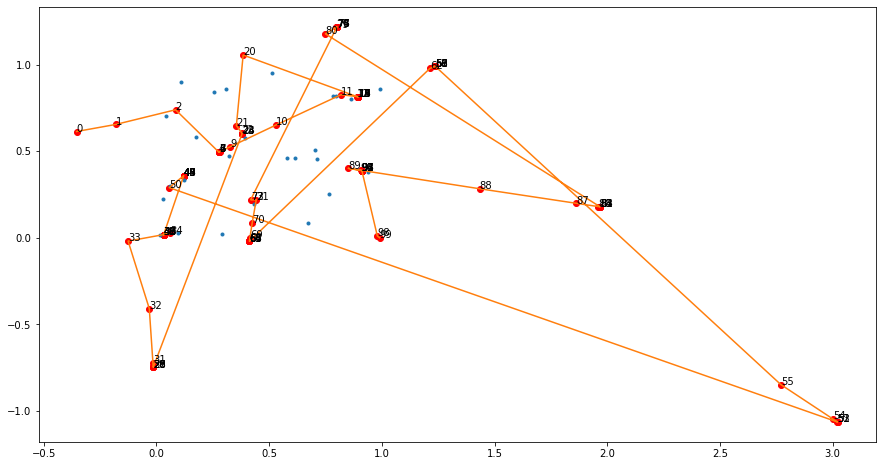

0    0.252358
1    0.008480
Name: 89, dtype: float64
68


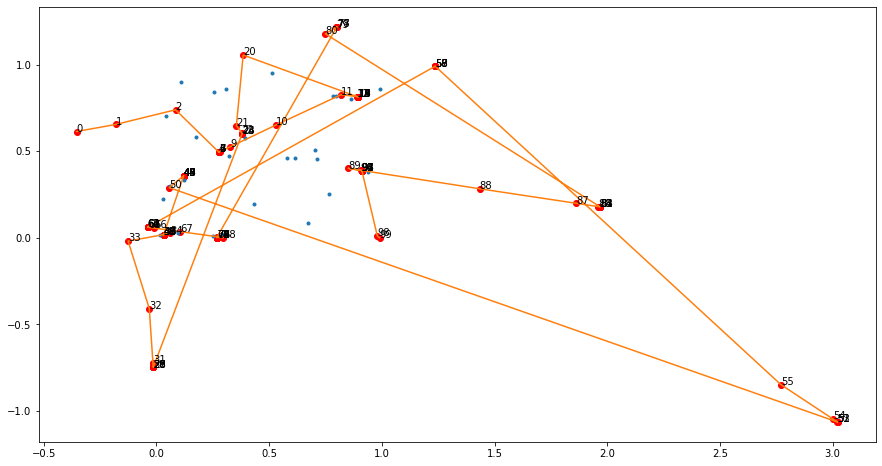

0    0.489694
1    0.029575
Name: 35, dtype: float64
68


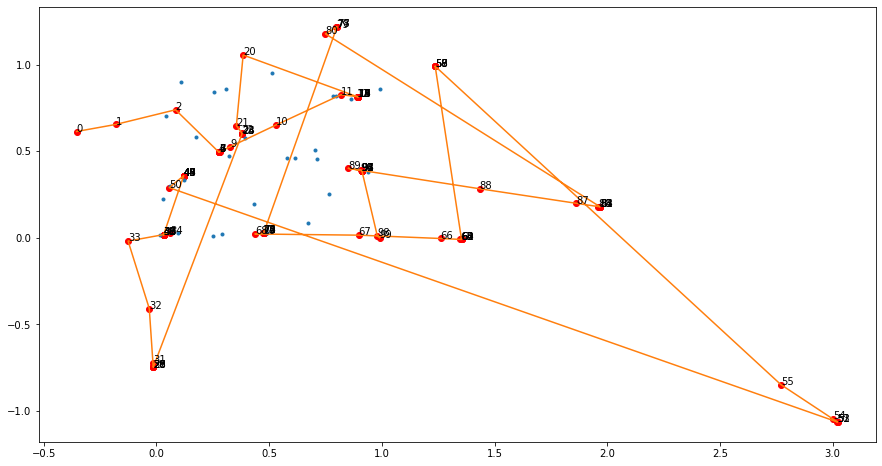

0    0.356790
1    0.346078
Name: 53, dtype: float64
3


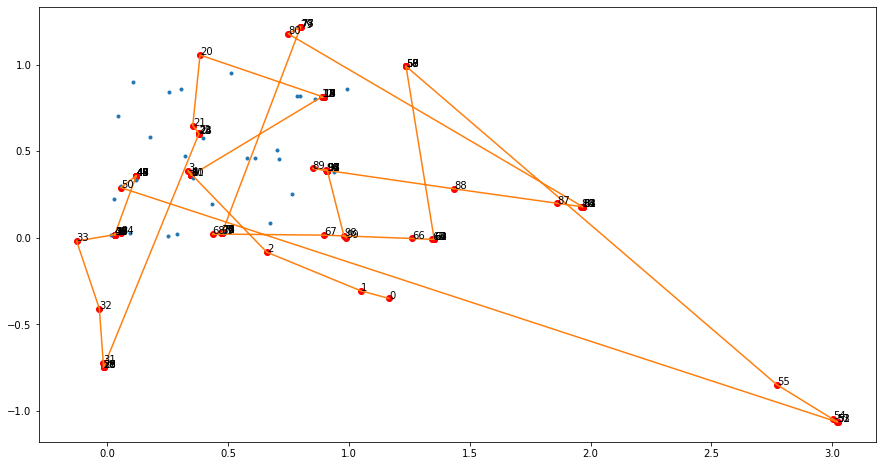

0    0.797404
1    0.414314
Name: 29, dtype: float64
89


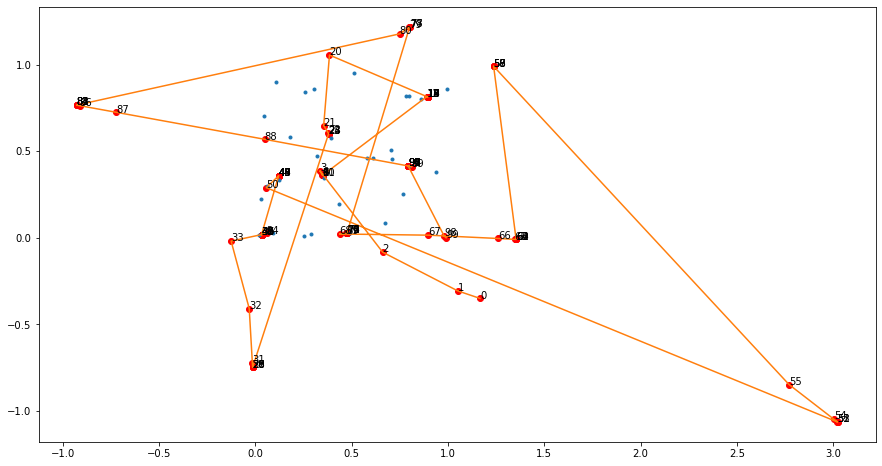

0    0.967903
1    0.875534
Name: 85, dtype: float64
18


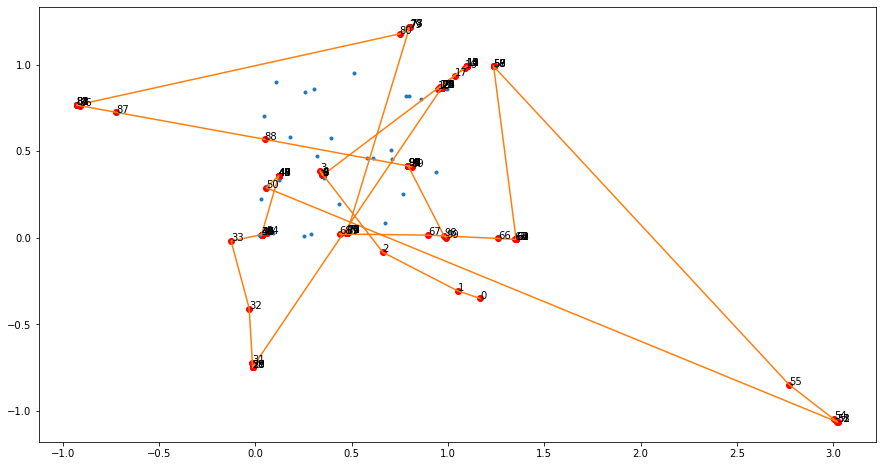

0    0.228762
1    0.945271
Name: 8, dtype: float64
88


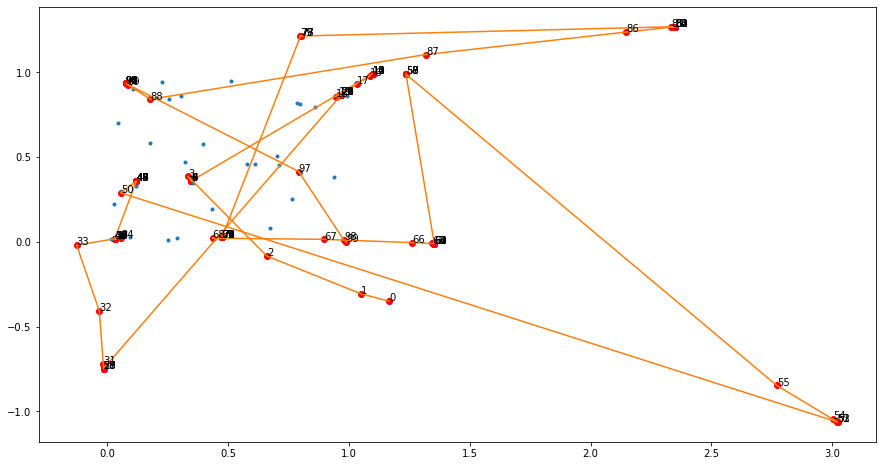

0    0.134364
1    0.847434
Name: 0, dtype: float64
88


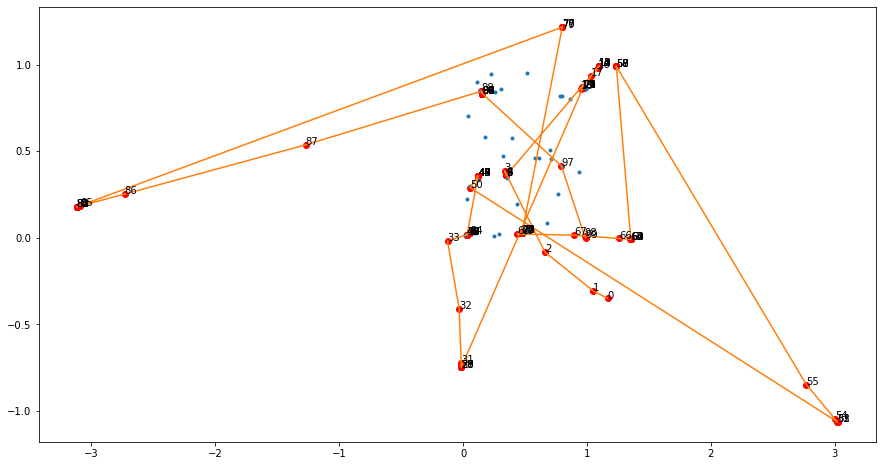

0    0.296073
1    0.499800
Name: 99, dtype: float64
3


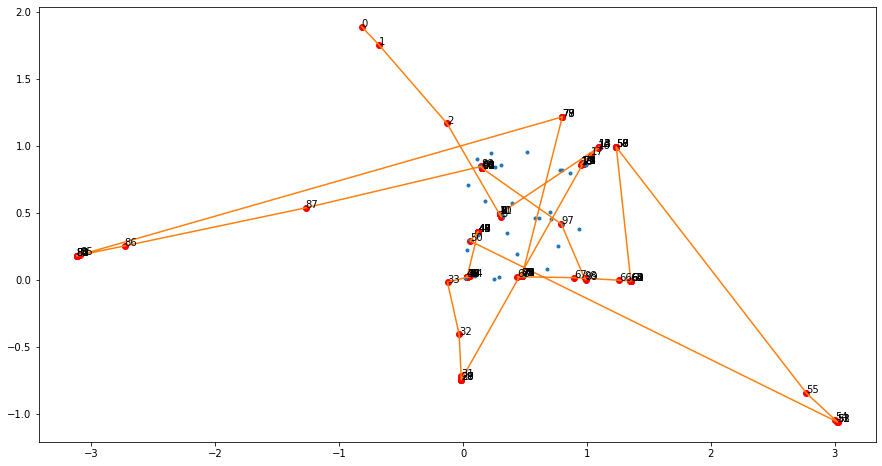

0    0.374703
1    0.438962
Name: 32, dtype: float64
3


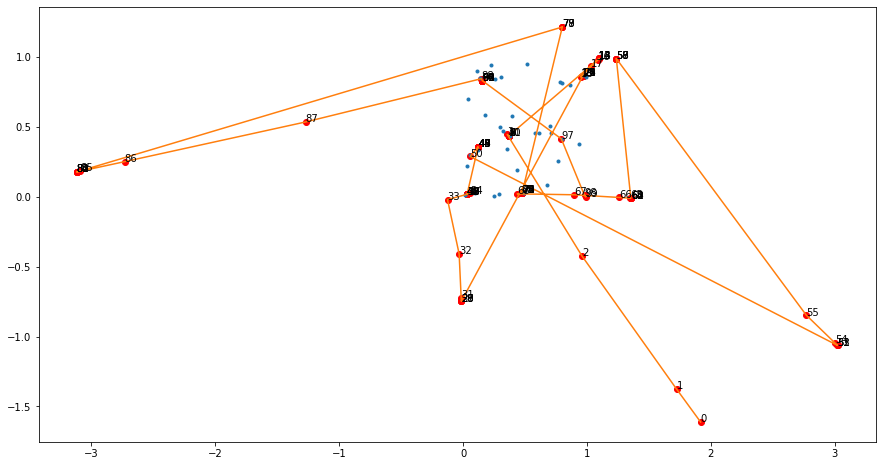

0    0.703041
1    0.674486
Name: 31, dtype: float64
97


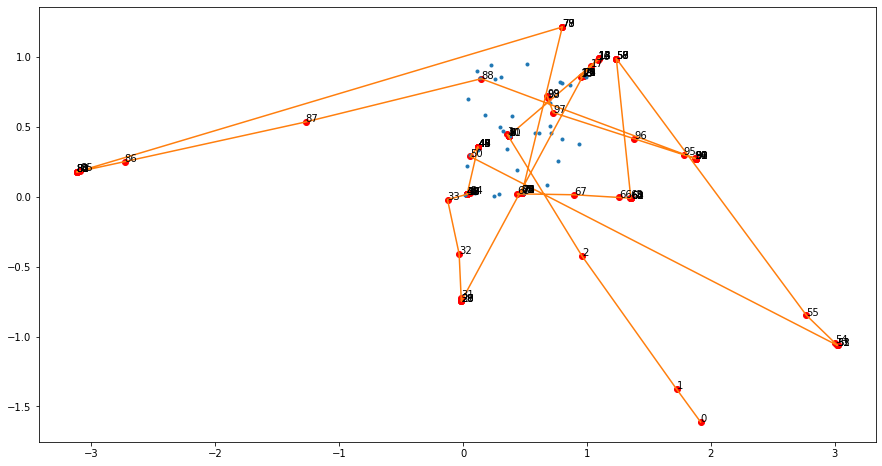

0    0.377969
1    0.346931
Name: 95, dtype: float64
10


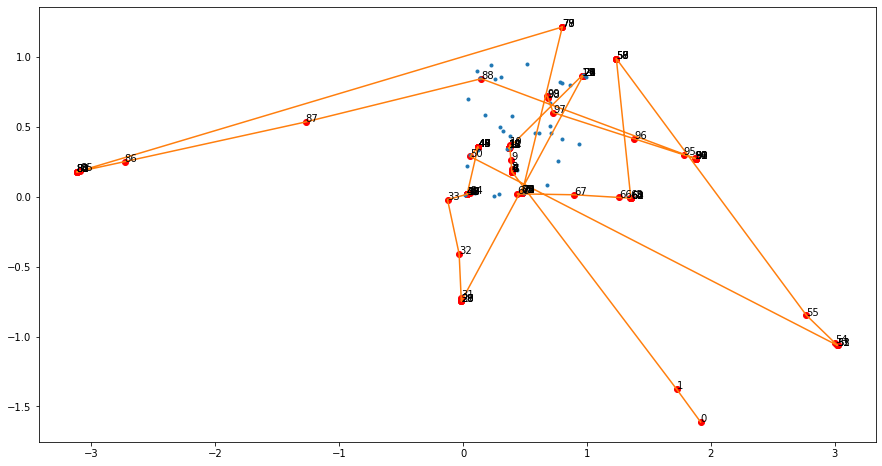

0    0.233084
1    0.230867
Name: 15, dtype: float64
9


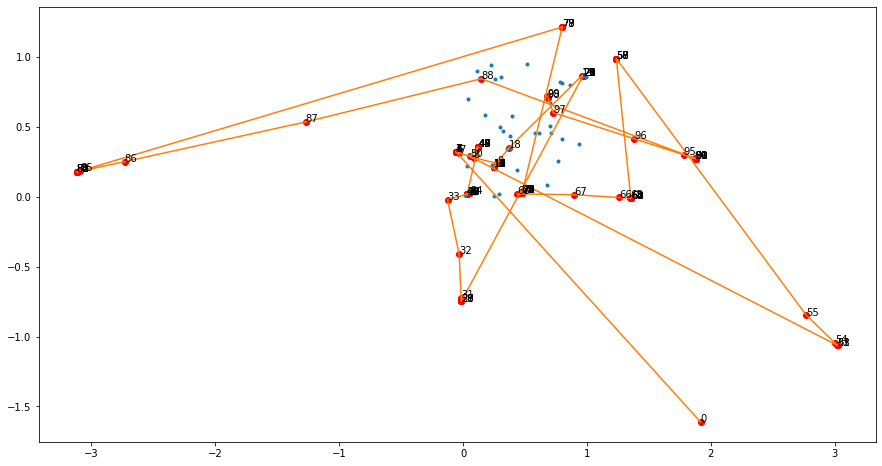

0    0.504720
1    0.484925
Name: 52, dtype: float64
18


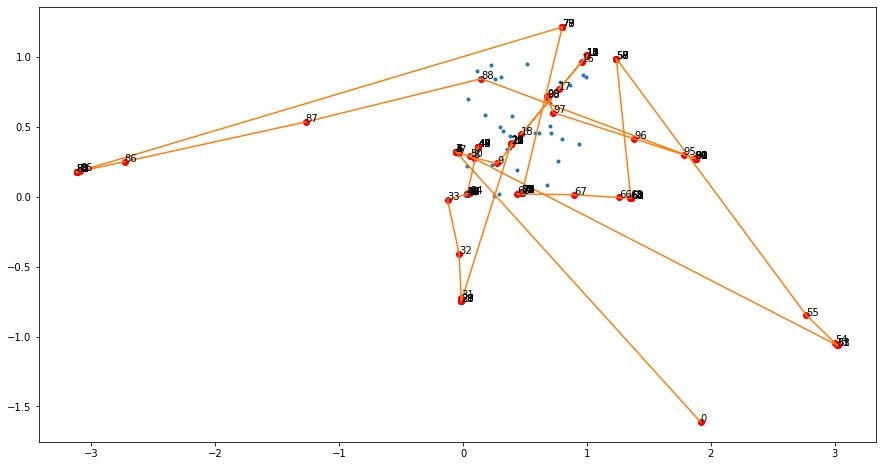

0    0.867781
1    0.973775
Name: 93, dtype: float64
16


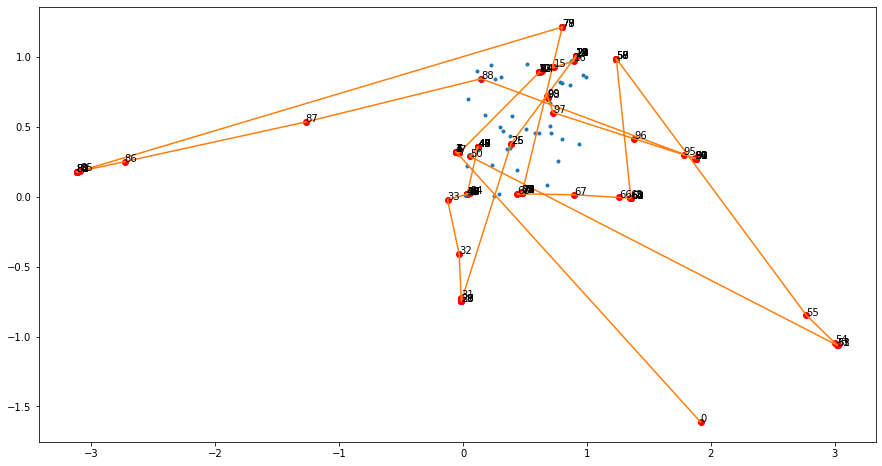

0    0.393600
1    0.170349
Name: 38, dtype: float64
68


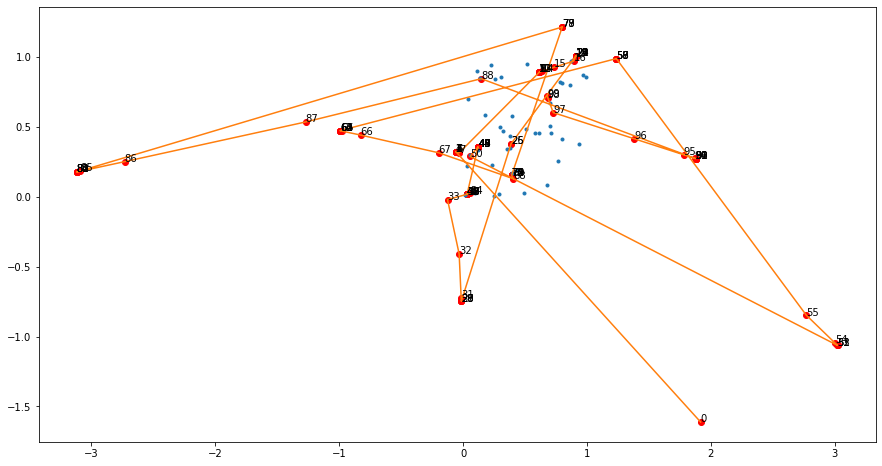

0    0.173007
1    0.548799
Name: 30, dtype: float64
48


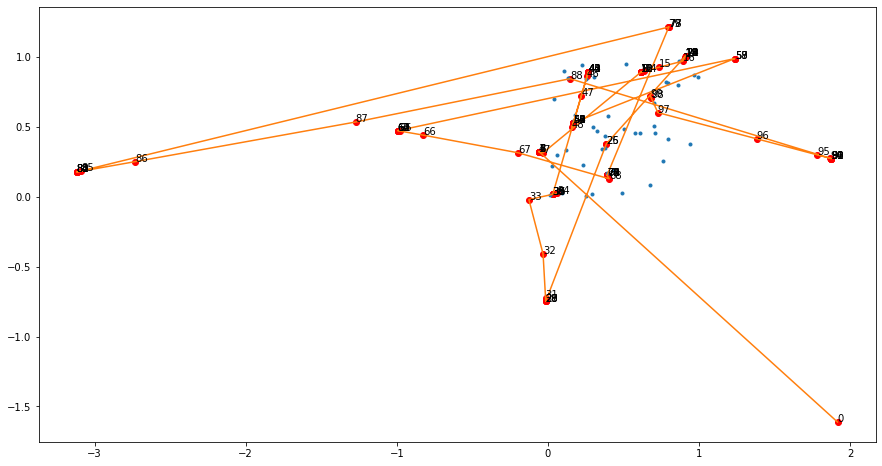

0    0.223196
1    0.648506
Name: 81, dtype: float64
47


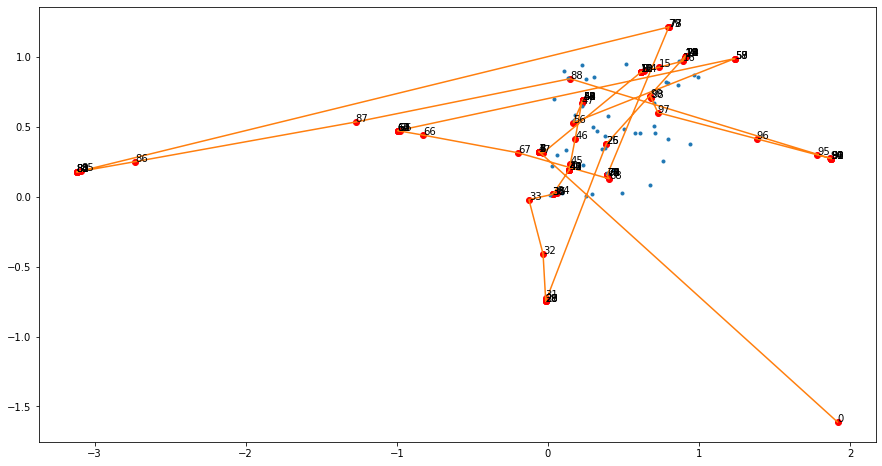

0    0.901427
1    0.030590
Name: 9, dtype: float64
68


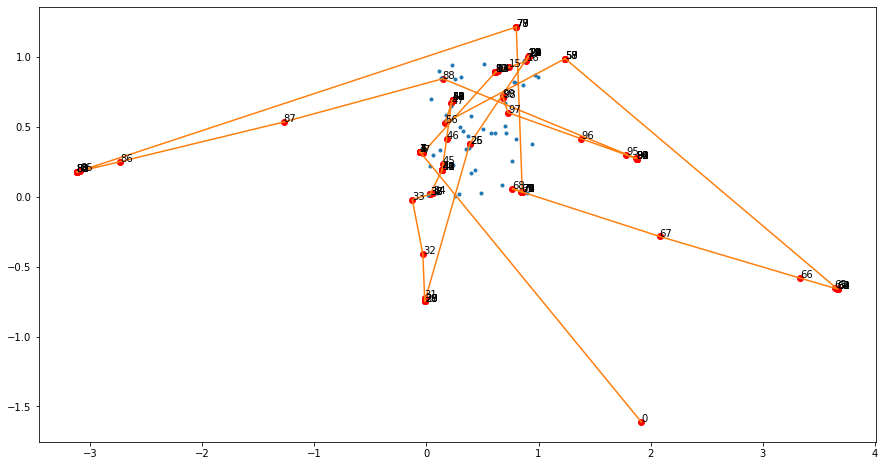

0    0.835765
1    0.432767
Name: 5, dtype: float64
97


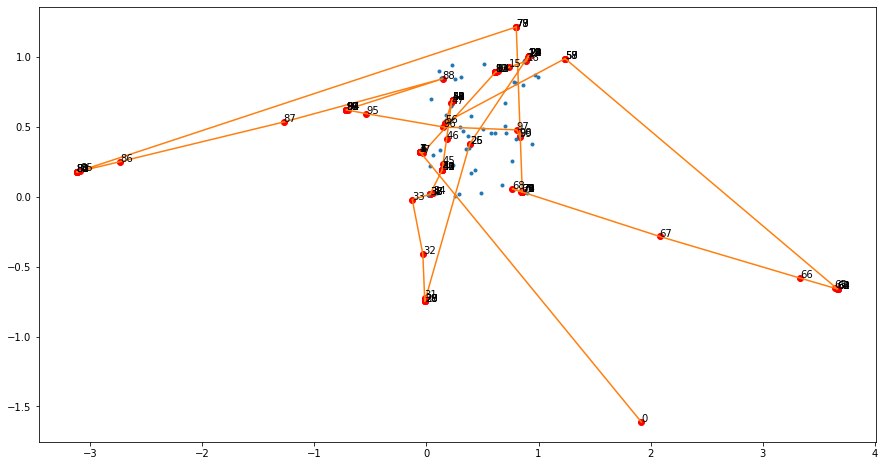

0    0.310364
1    0.939288
Name: 87, dtype: float64
88


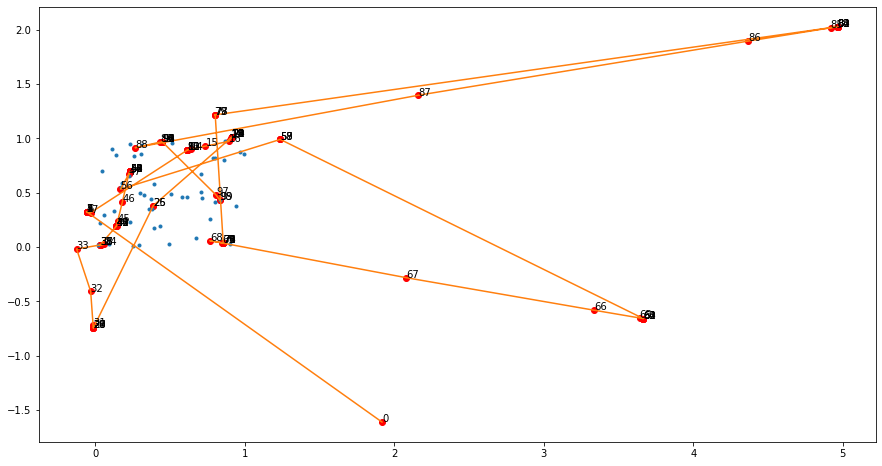

0    0.025446
1    0.541412
Name: 10, dtype: float64
56


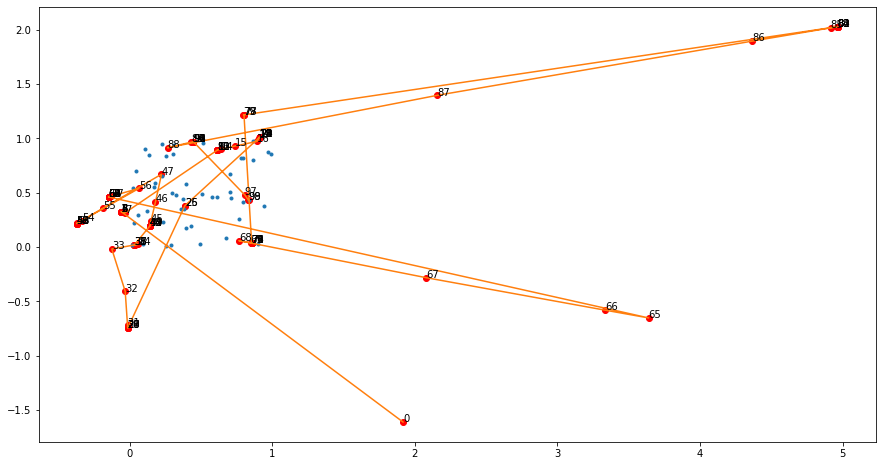

0    0.983188
1    0.593184
Name: 37, dtype: float64
97


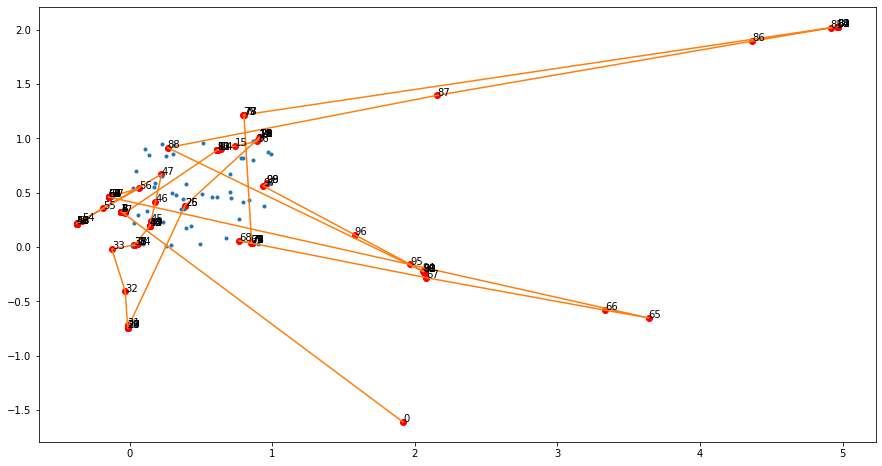

0    0.502239
1    0.982077
Name: 39, dtype: float64
10


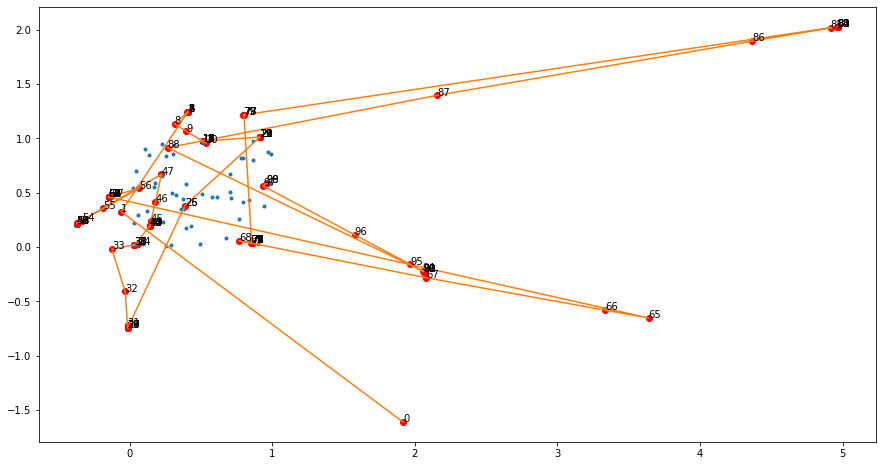

0    0.220600
1    0.975595
Name: 79, dtype: float64
88


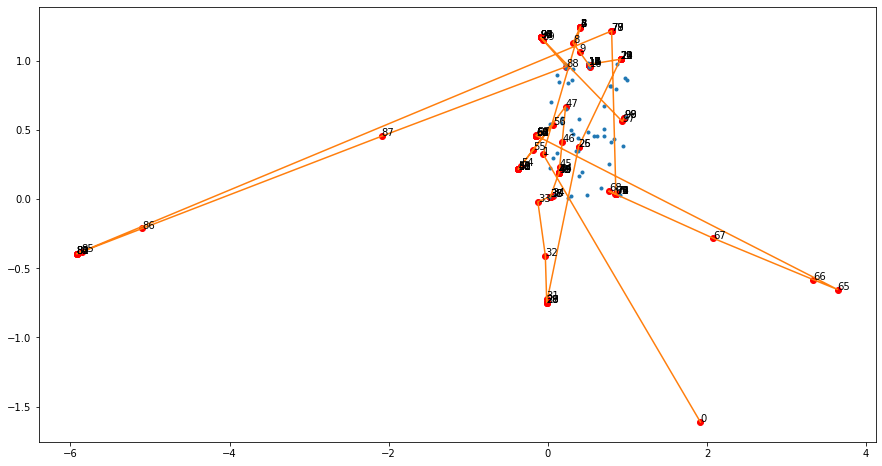

0    0.109489
1    0.624802
Name: 64, dtype: float64
56


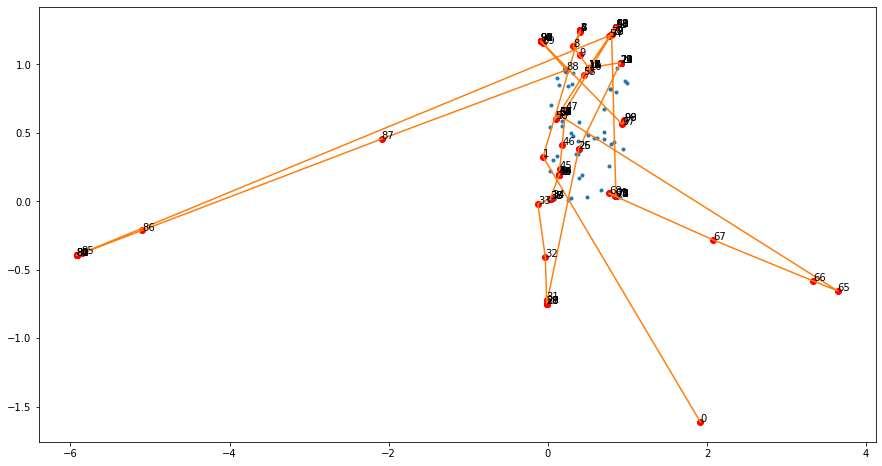

0    0.420919
1    0.188039
Name: 71, dtype: float64
25


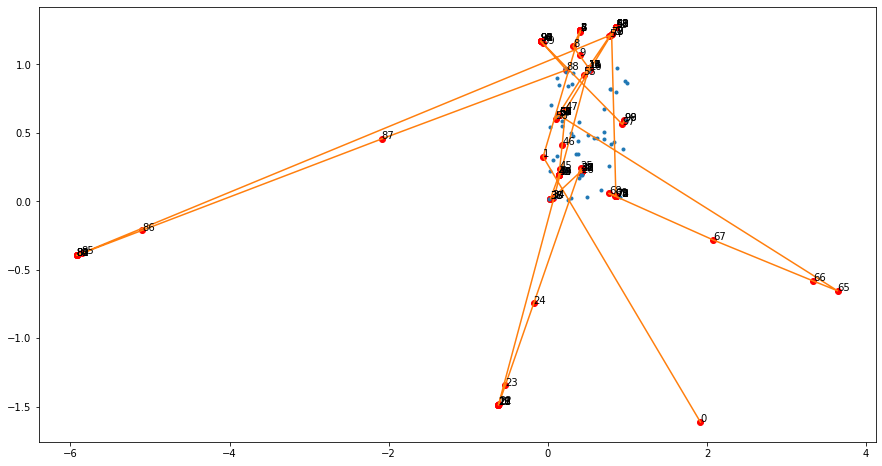

0    0.642294
1    0.185906
Name: 19, dtype: float64
68


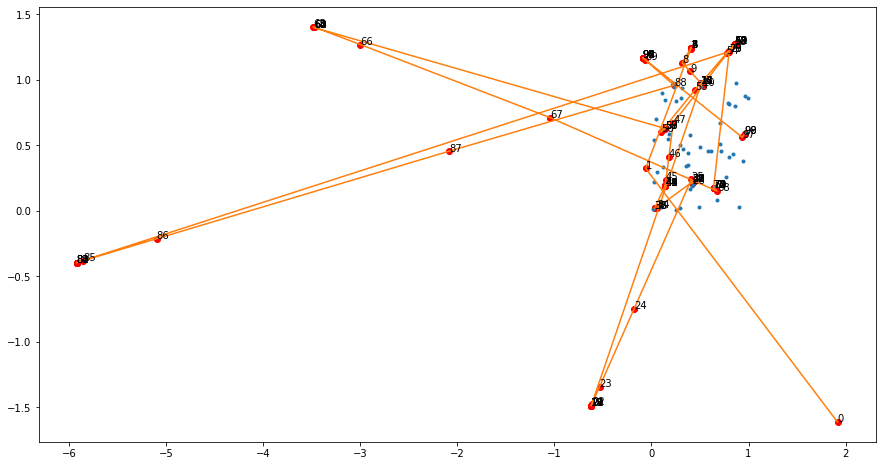

0    0.321246
1    0.630948
Name: 83, dtype: float64
47


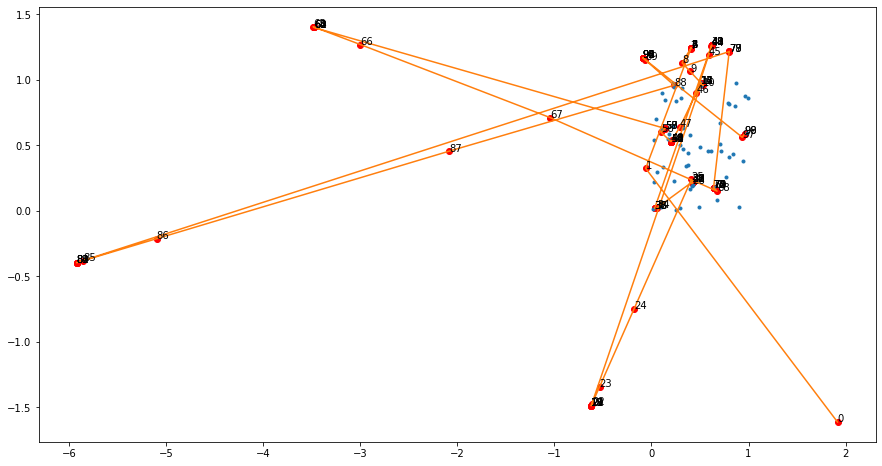

0    0.721484
1    0.711192
Name: 22, dtype: float64
97


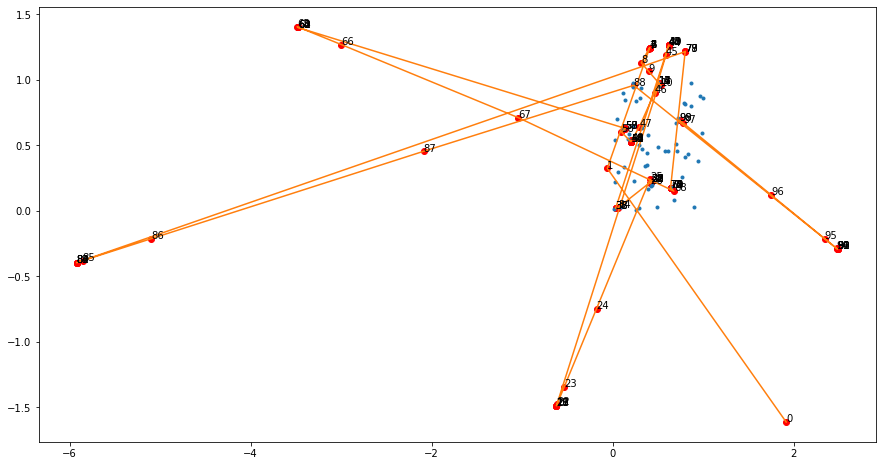

0    0.561358
1    0.426091
Name: 49, dtype: float64
25


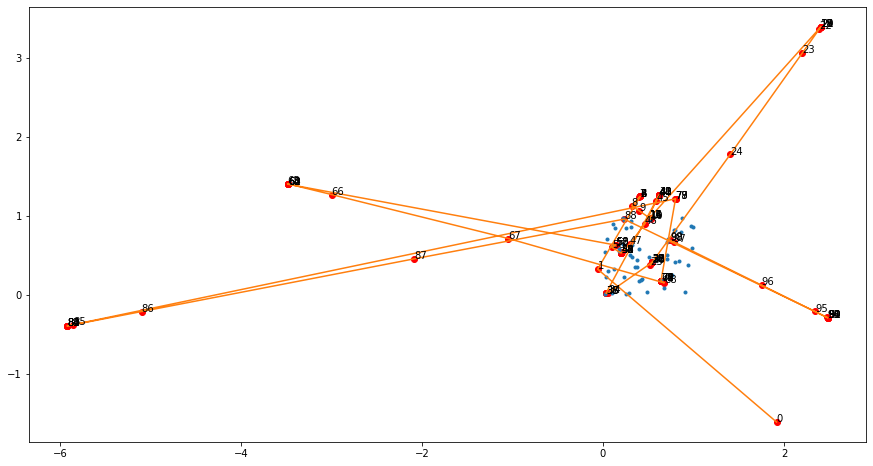

0    0.495435
1    0.449491
Name: 2, dtype: float64
32


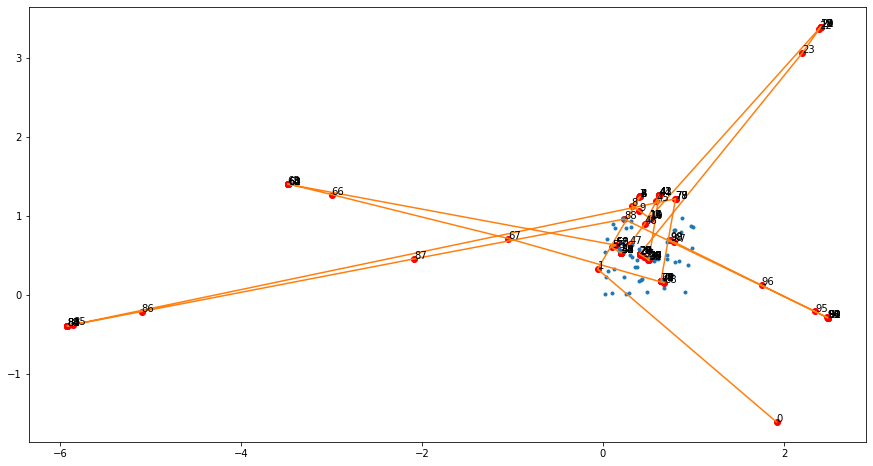

0    0.344423
1    0.069515
Name: 65, dtype: float64
75


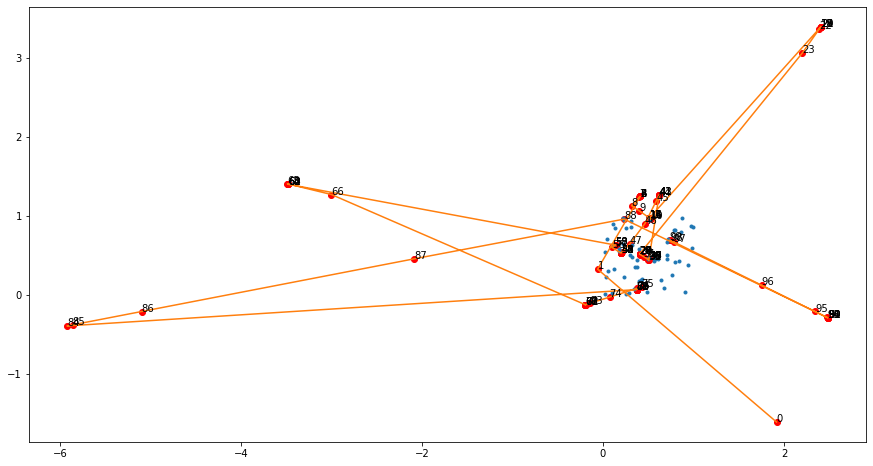

0    0.104424
1    0.665958
Name: 98, dtype: float64
57


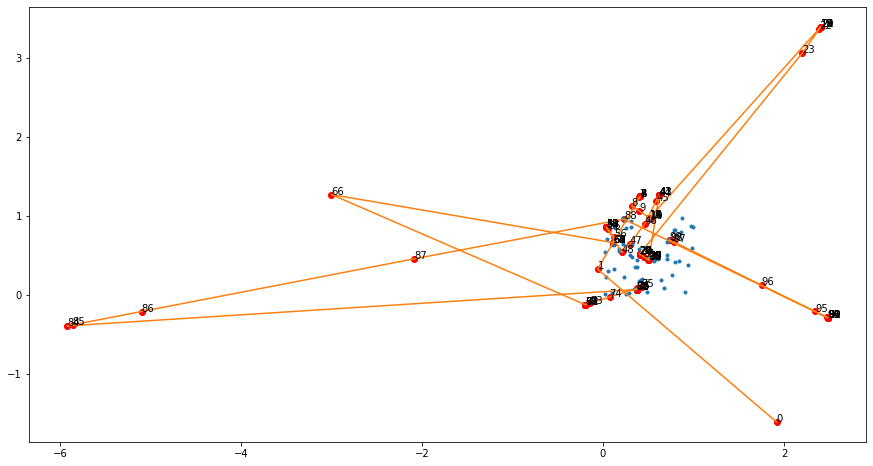

0    0.445387
1    0.721540
Name: 7, dtype: float64
47


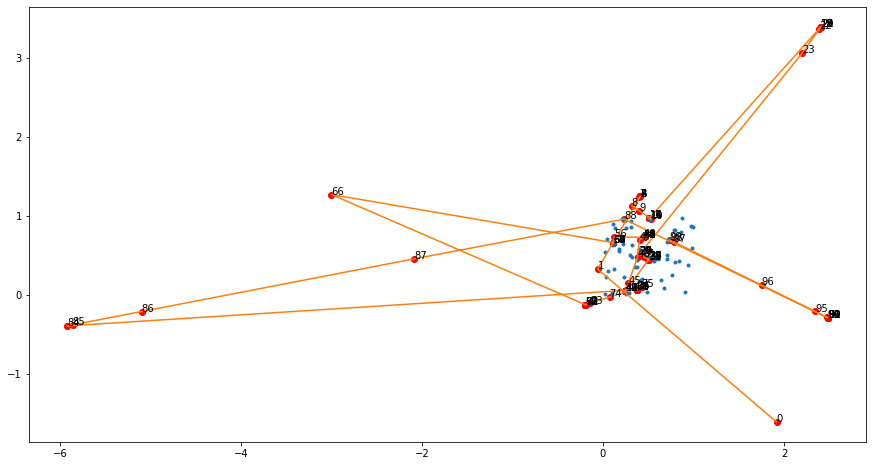

0    0.651593
1    0.788723
Name: 3, dtype: float64
99


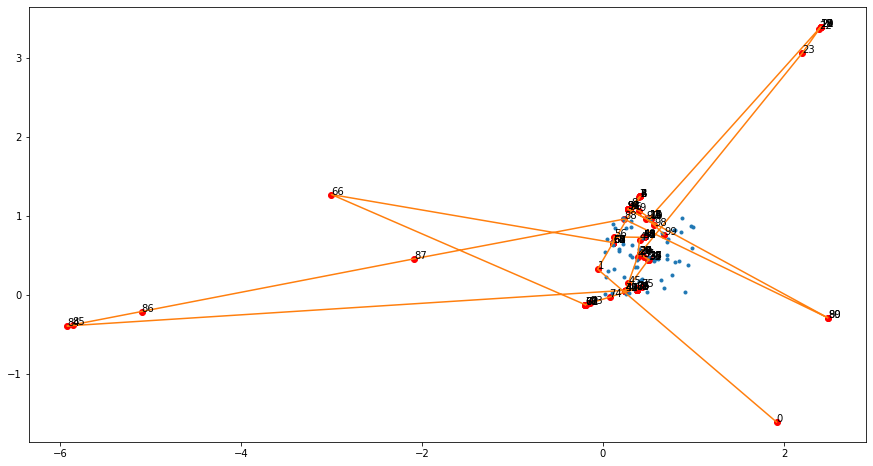

0    0.216599
1    0.422117
Name: 12, dtype: float64
46


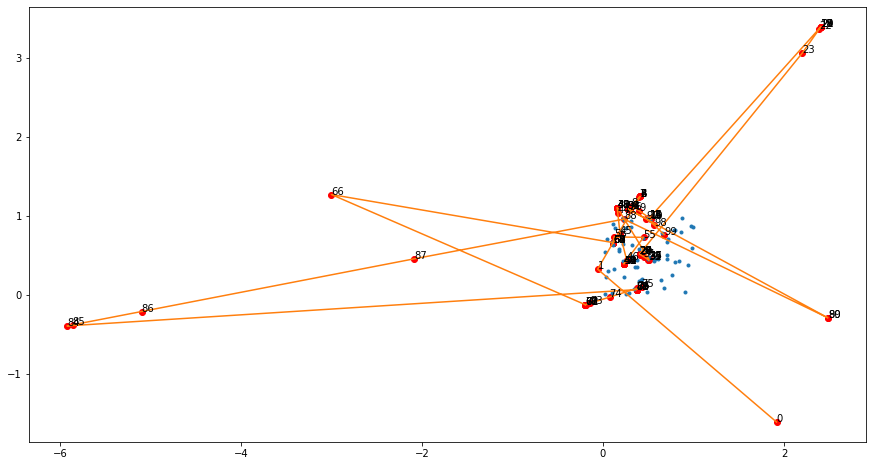

0    0.878718
1    0.037917
Name: 90, dtype: float64
75


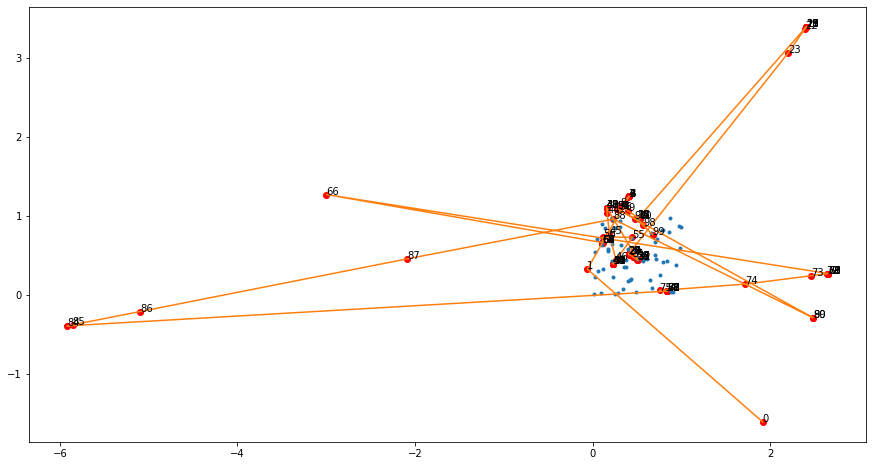

0    0.538479
1    0.623489
Name: 54, dtype: float64
55


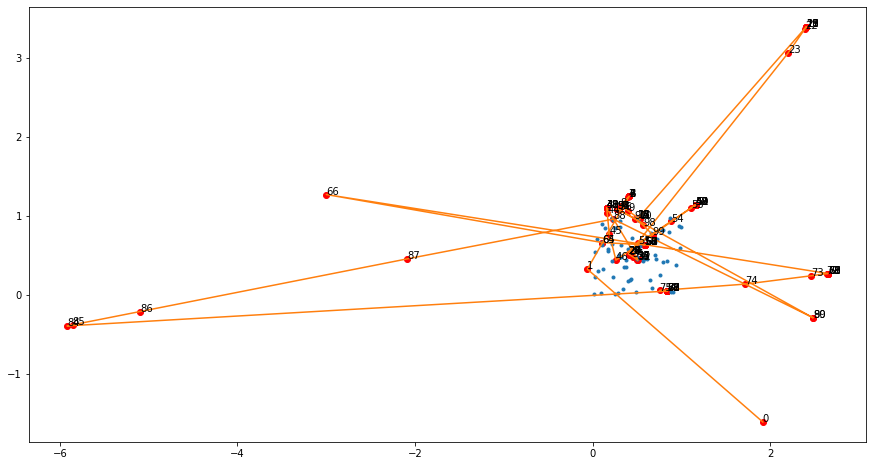

0    0.886180
1    0.740503
Name: 47, dtype: float64
54


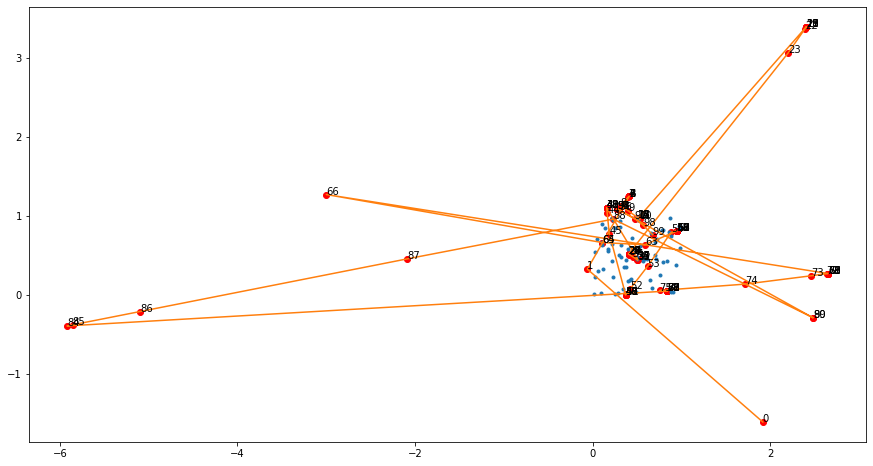

0    0.819414
1    0.962201
Name: 91, dtype: float64
54


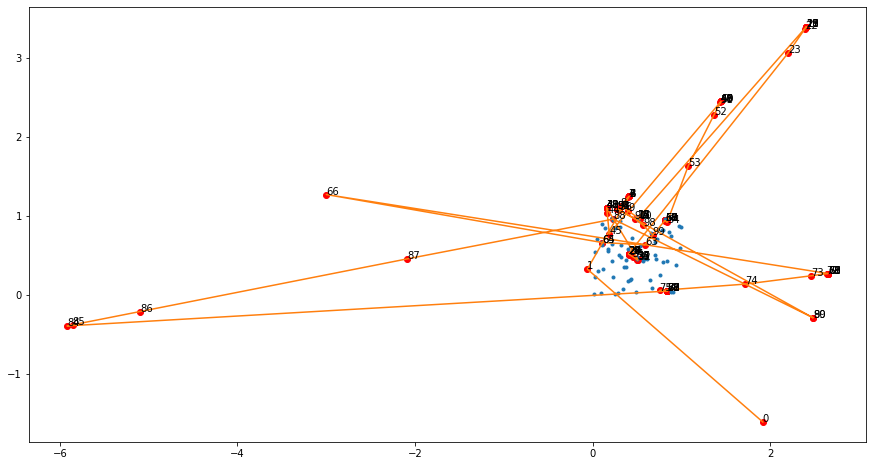

0    0.762280
1    0.002106
Name: 6, dtype: float64
75


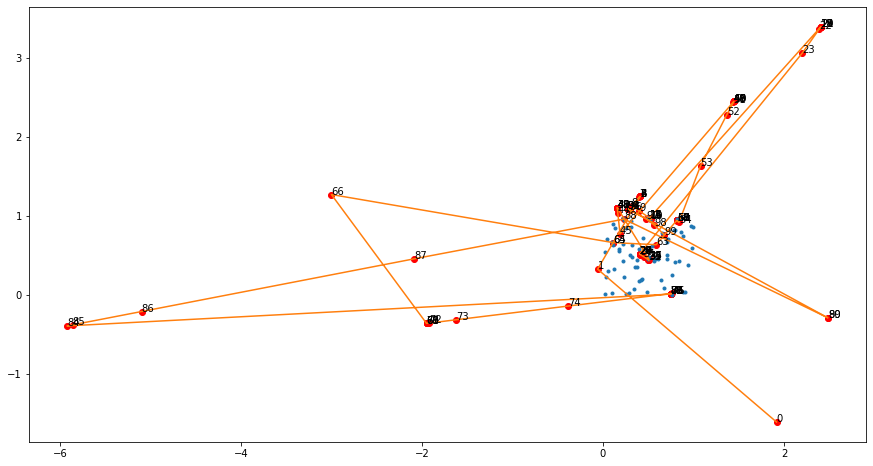

0    0.605649
1    0.817040
Name: 74, dtype: float64
98


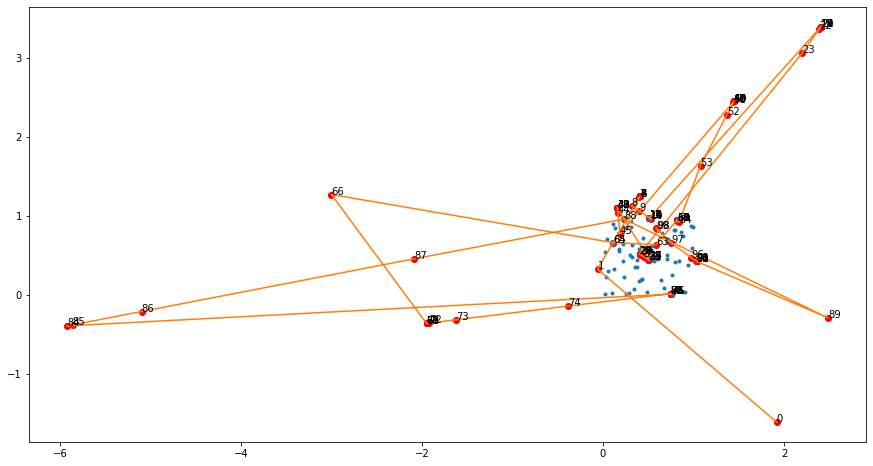

0    0.755587
1    0.249559
Name: 63, dtype: float64
75


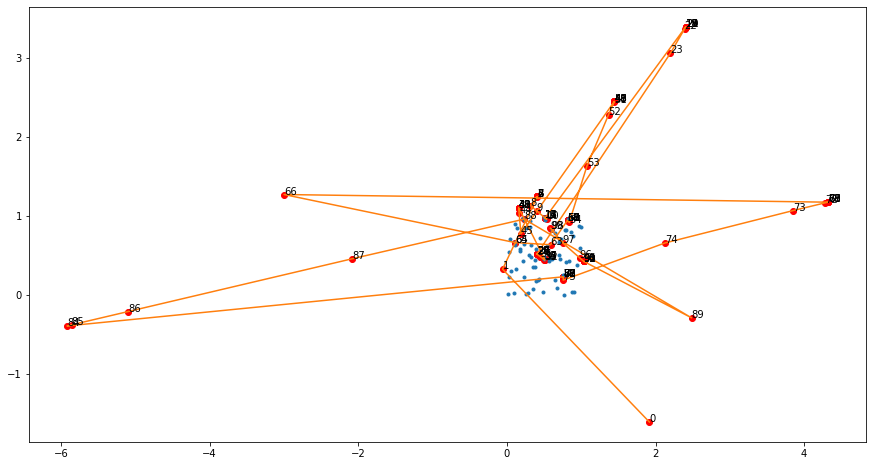

0    0.860290
1    0.232176
Name: 41, dtype: float64
82


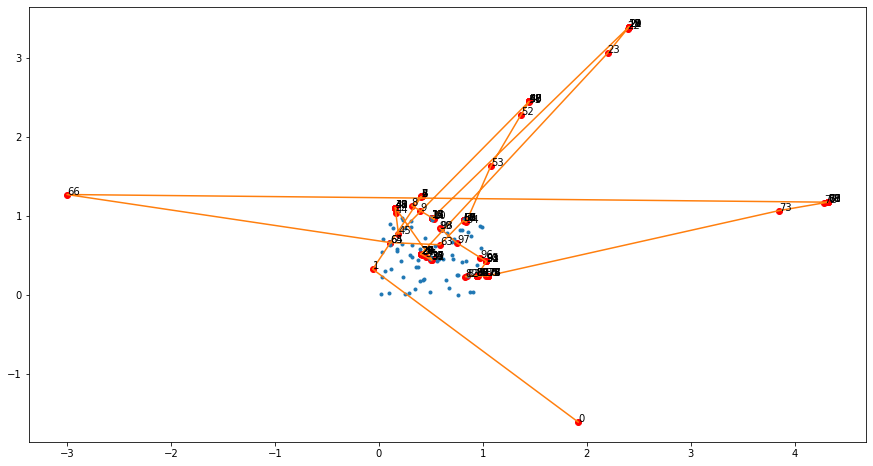

0    0.056123
1    0.870010
Name: 50, dtype: float64
45


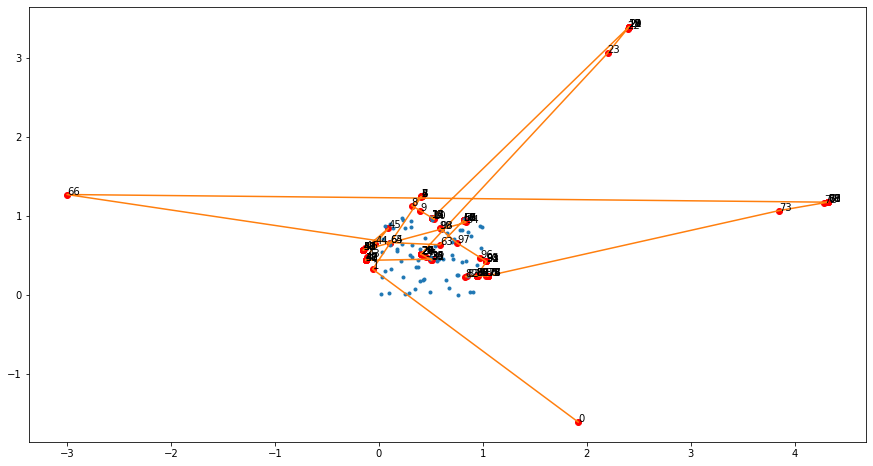

0    0.027975
1    0.229605
Name: 56, dtype: float64
1


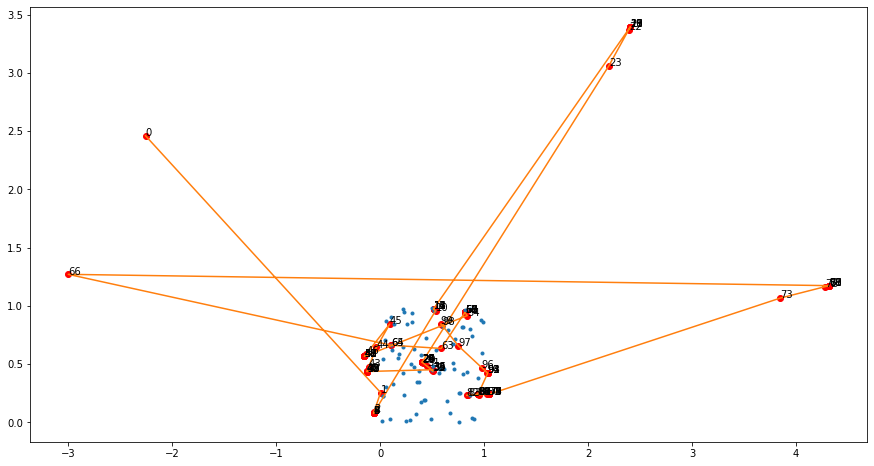

0    0.797811
1    0.516600
Name: 80, dtype: float64
97


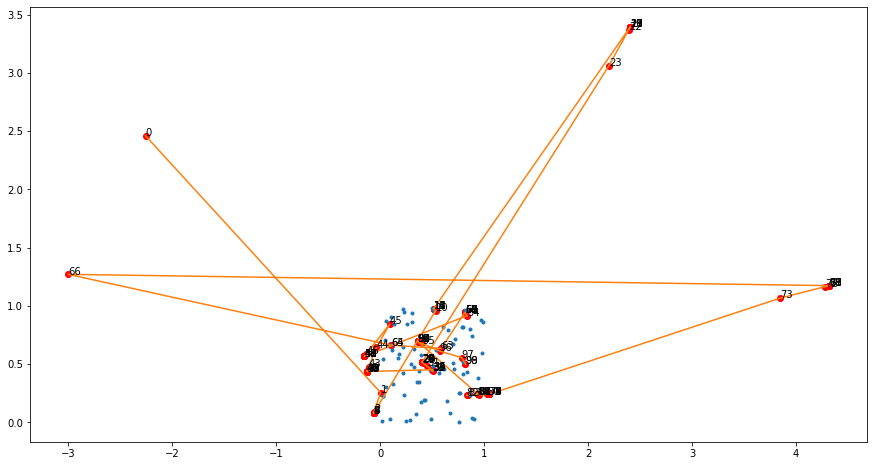

0    0.770523
1    0.539617
Name: 40, dtype: float64
97


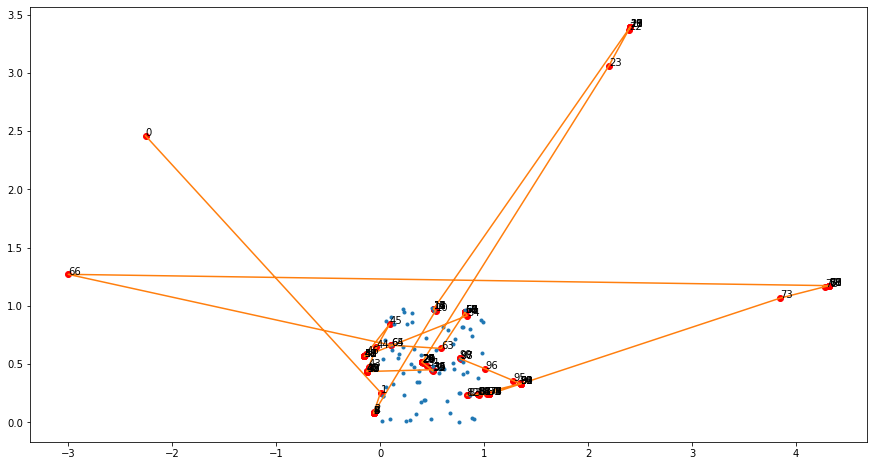

0    0.882479
1    0.846197
Name: 26, dtype: float64
54


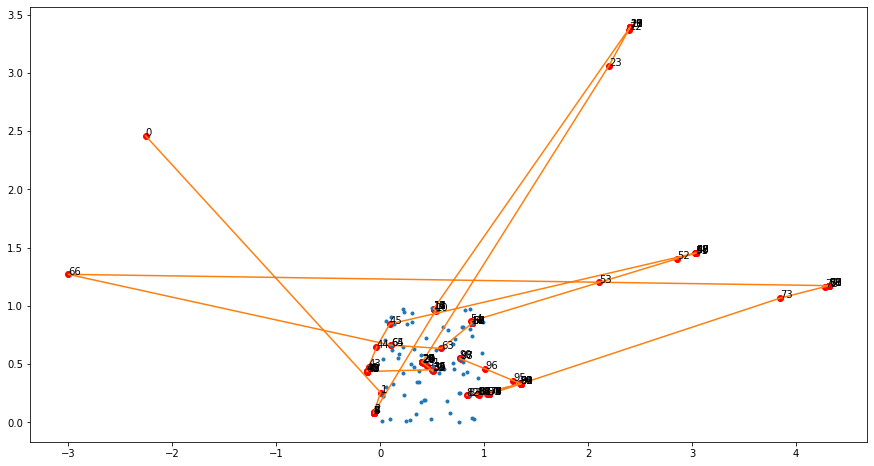

0    0.269279
1    0.547996
Name: 44, dtype: float64
24


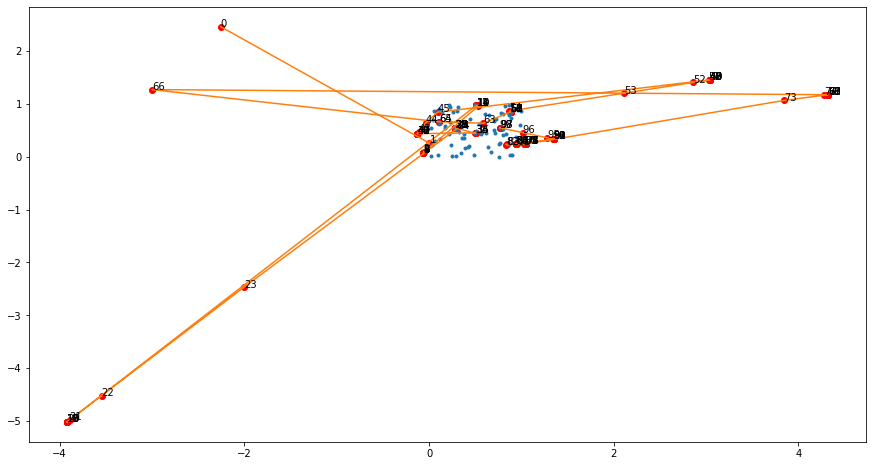

0    0.957116
1    0.005709
Name: 45, dtype: float64
81


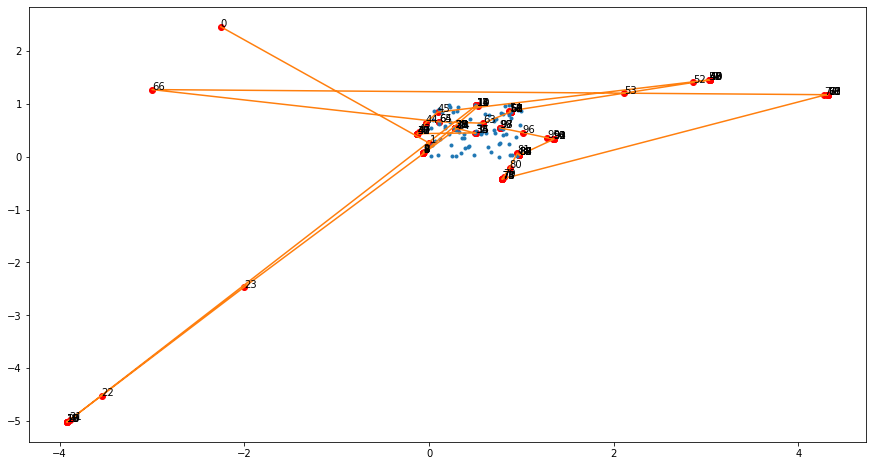

0    0.023635
1    0.386557
Name: 70, dtype: float64
1


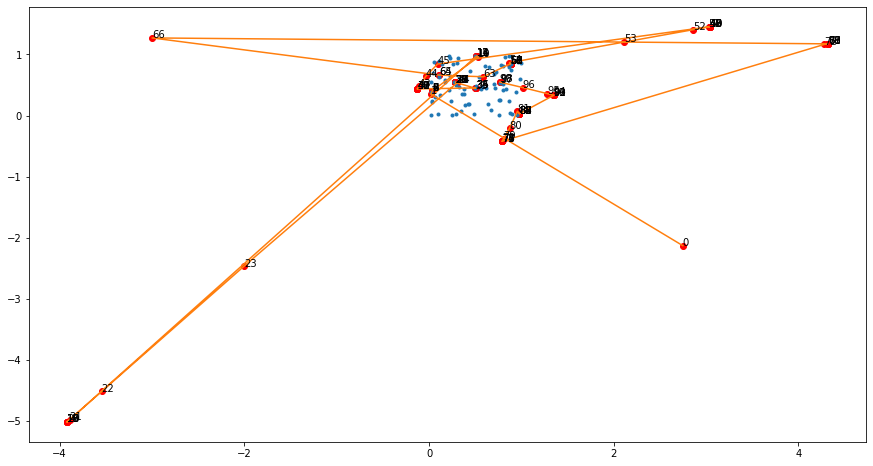

0    0.520938
1    0.393255
Name: 34, dtype: float64
33


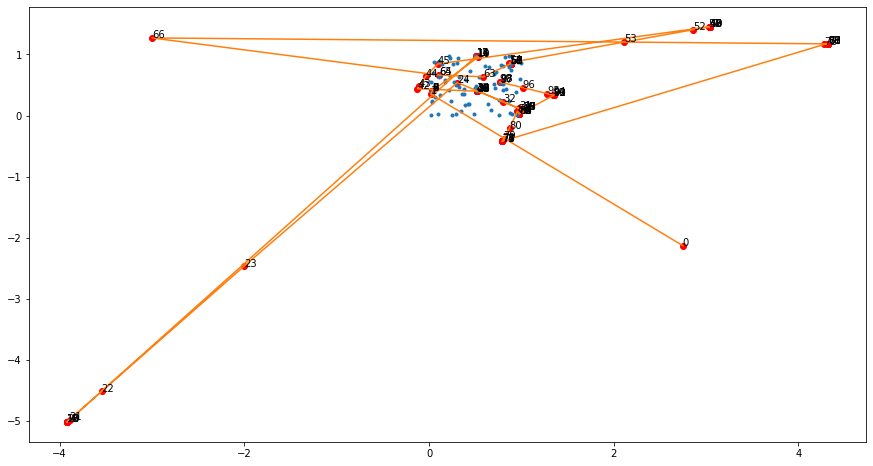

0    0.160228
1    0.704606
Name: 77, dtype: float64
65


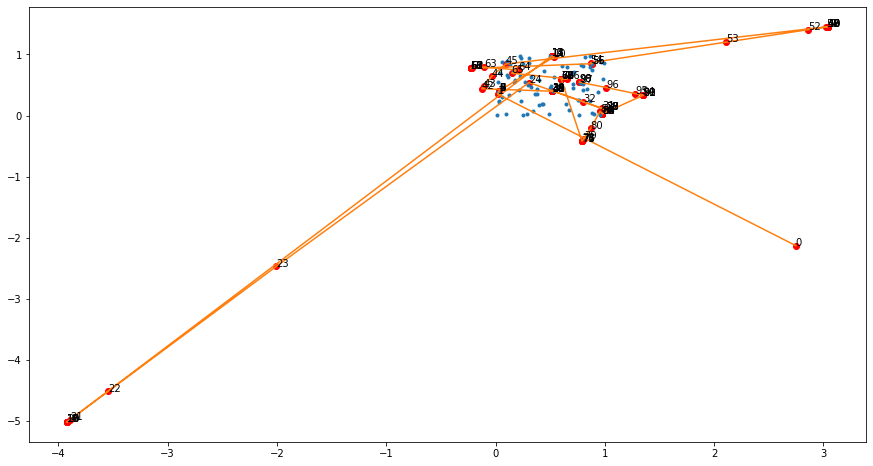

0    0.505284
1    0.589002
Name: 27, dtype: float64
72


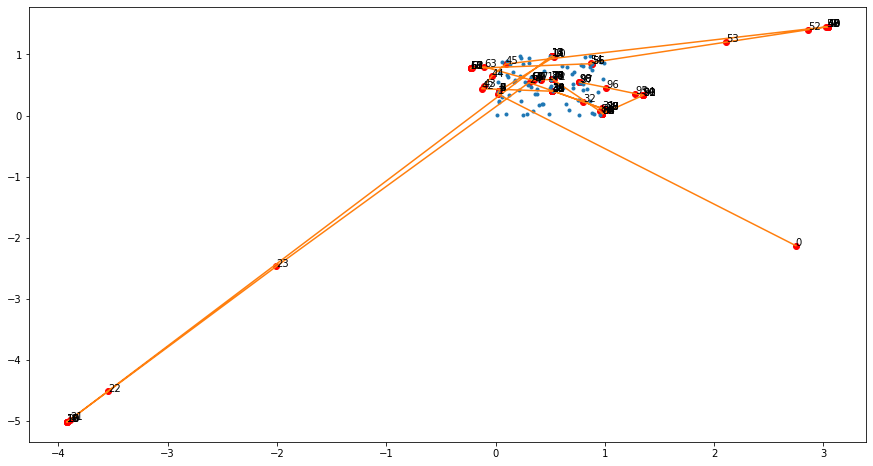

0    0.837578
1    0.556454
Name: 18, dtype: float64
97


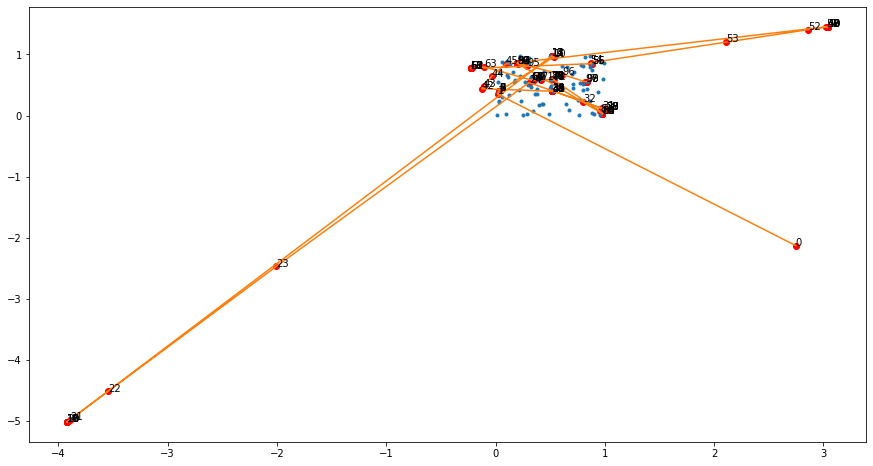

0    0.570281
1    0.171517
Name: 92, dtype: float64
40


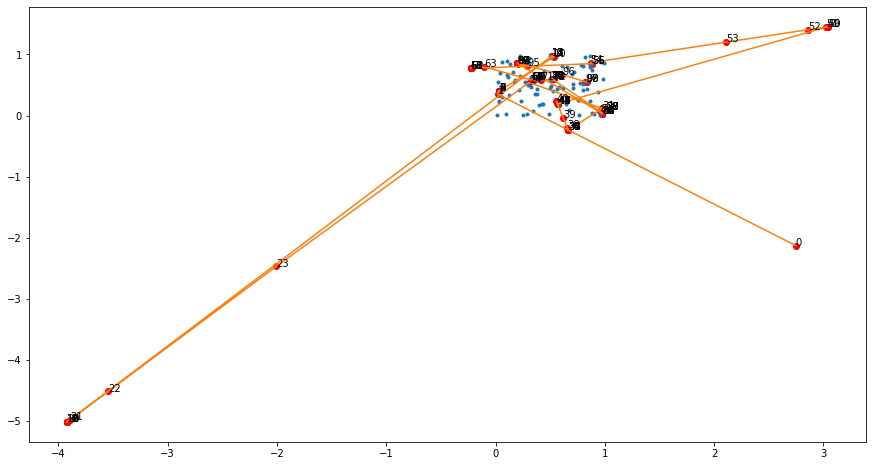

0    0.569999
1    0.199839
Name: 51, dtype: float64
41


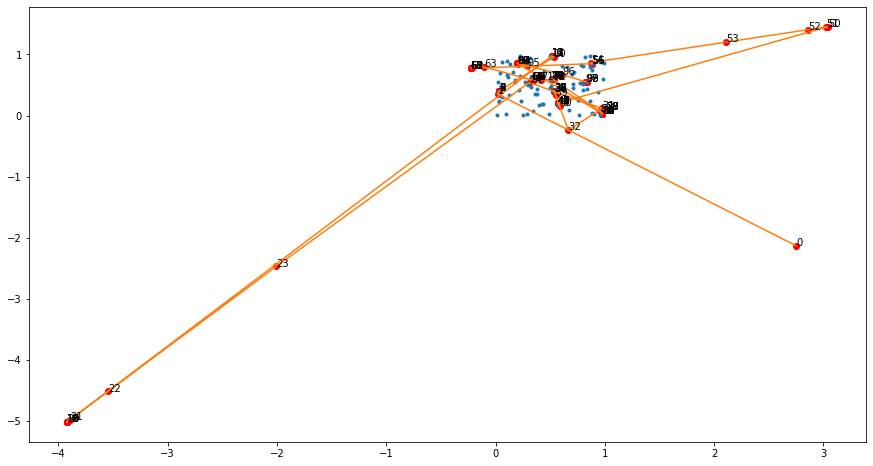

0    0.218781
1    0.459603
Name: 16, dtype: float64
24


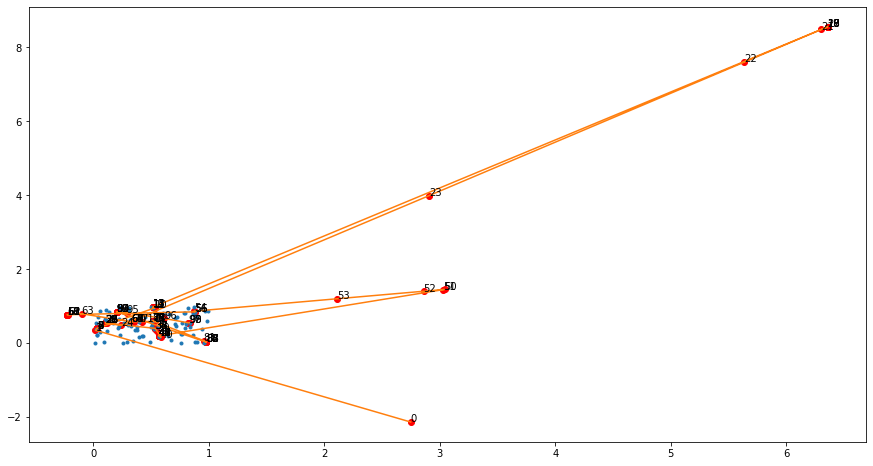

0    0.146462
1    0.718835
Name: 76, dtype: float64
94


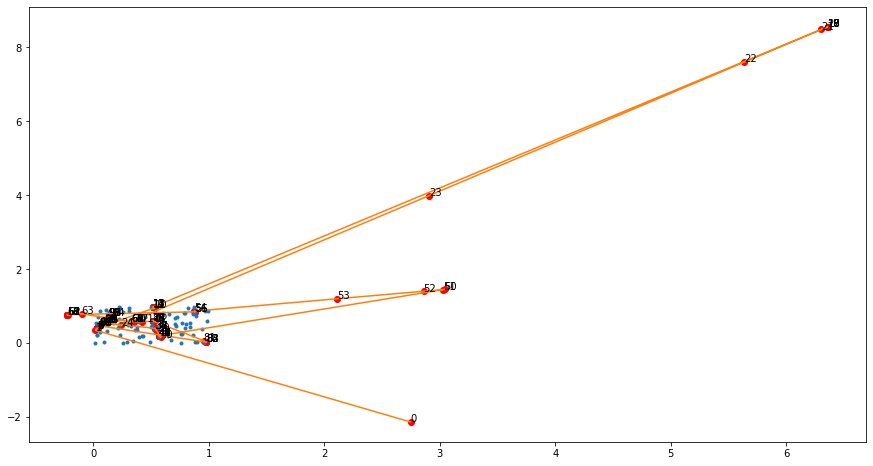

0    0.437888
1    0.495812
Name: 14, dtype: float64
71


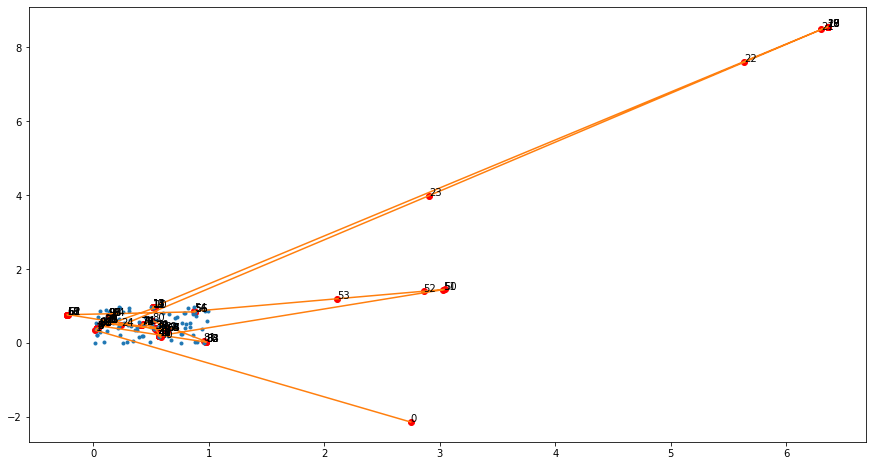

0    0.168145
1    0.272914
Name: 67, dtype: float64
1


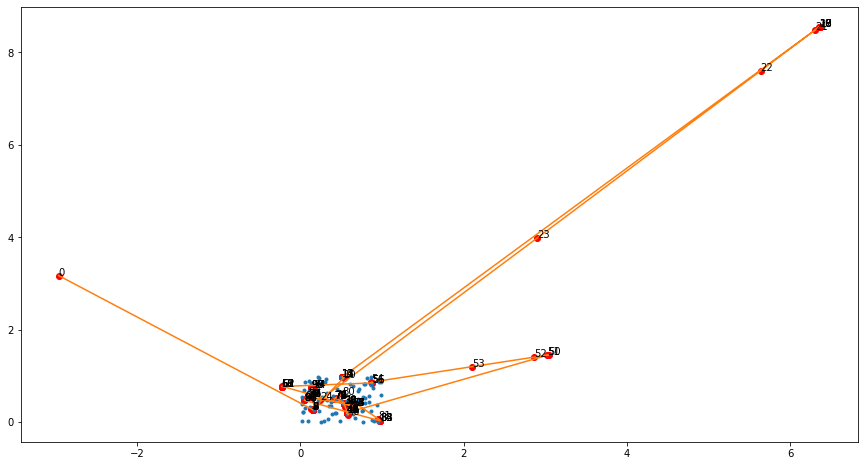

0    0.936441
1    0.422107
Name: 23, dtype: float64
63


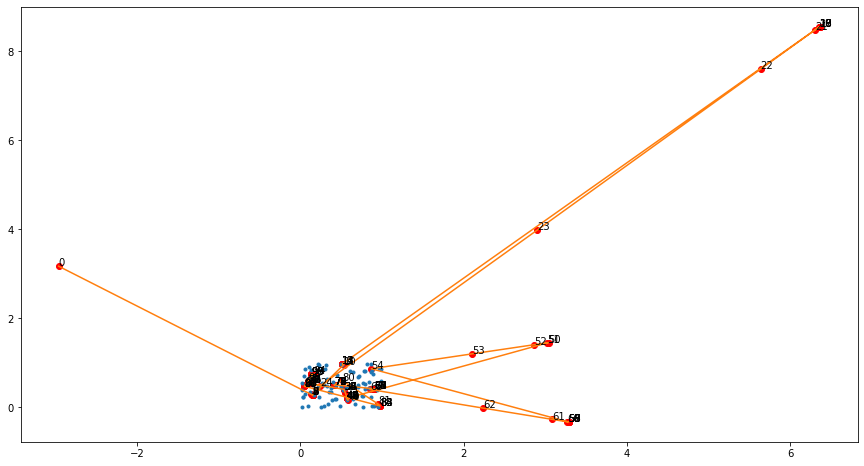

0    0.303369
1    0.587581
Name: 25, dtype: float64
24


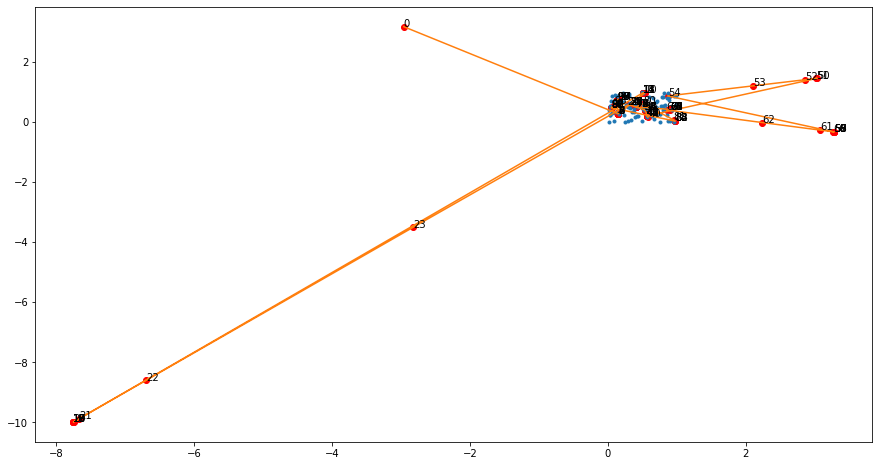

0    0.034526
1    0.242740
Name: 28, dtype: float64
1


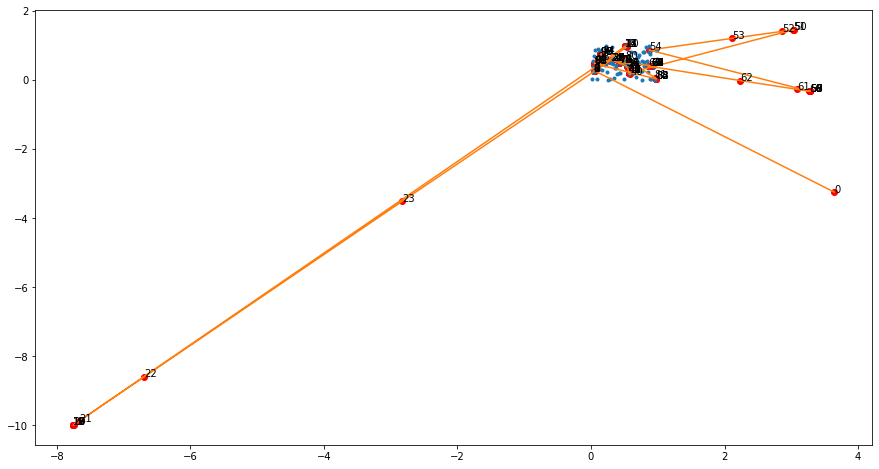

0    0.830036
1    0.670306
Name: 24, dtype: float64
54


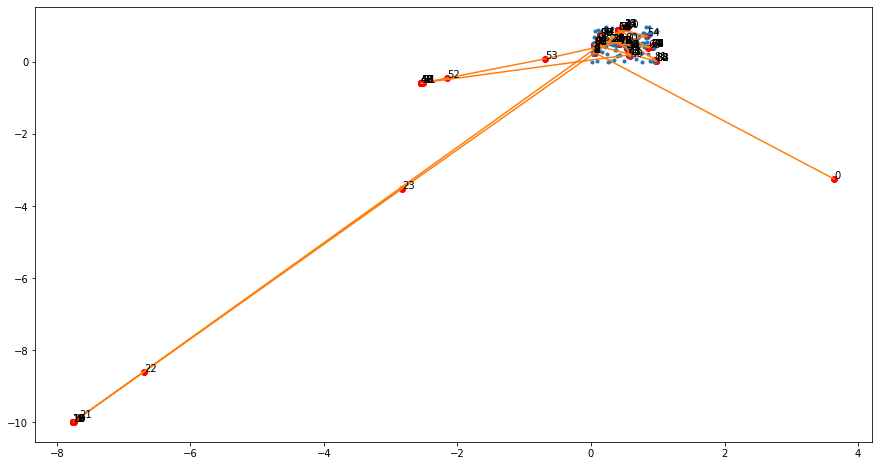

0    0.809140
1    0.518678
Name: 48, dtype: float64
63


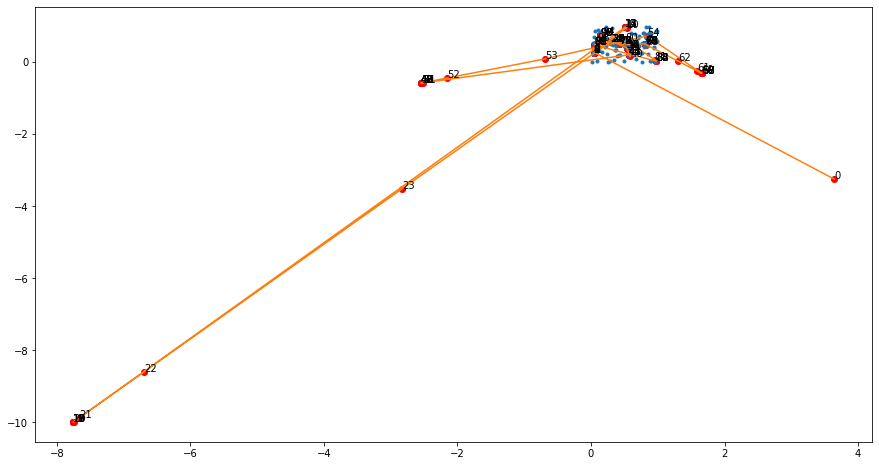

0    0.020818
1    0.017865
Name: 75, dtype: float64
8


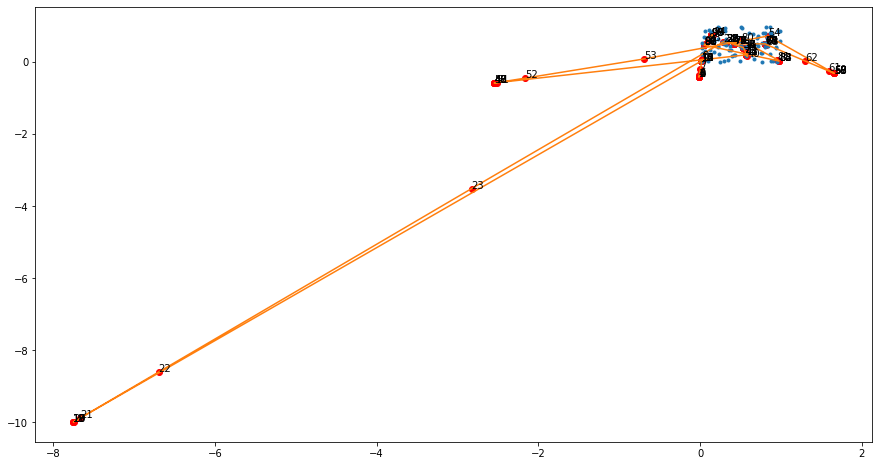

0    0.678176
1    0.544702
Name: 78, dtype: float64
70


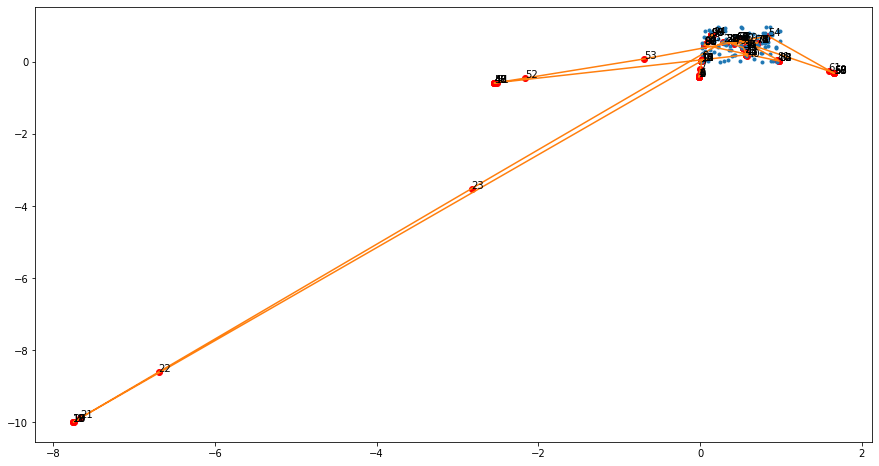

0    0.743842
1    0.416172
Name: 88, dtype: float64
70


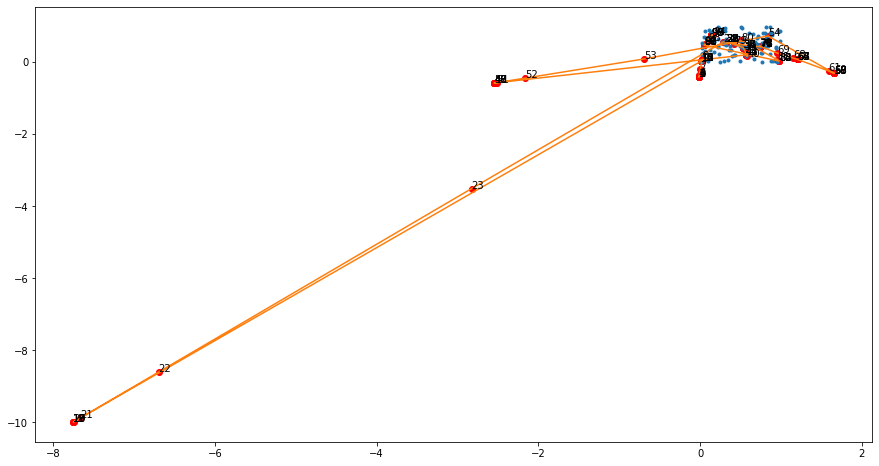

0    0.508426
1    0.778443
Name: 33, dtype: float64
80


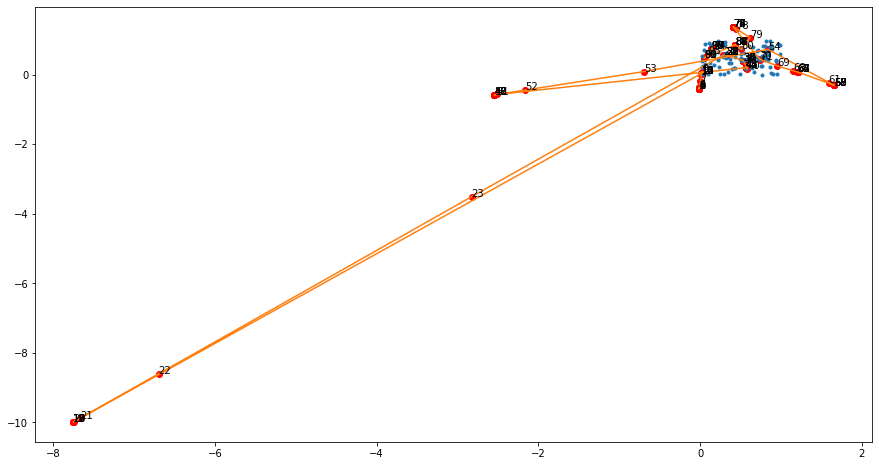

0    0.510116
1    0.209091
Name: 73, dtype: float64
45


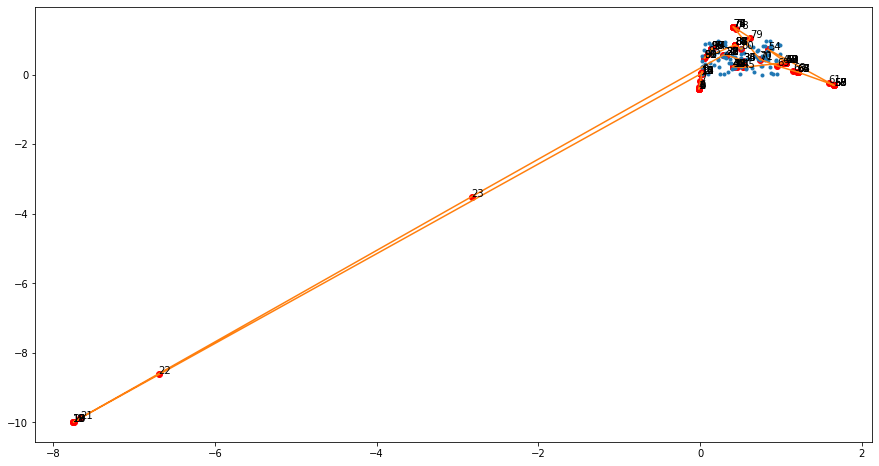

0    0.159626
1    0.527380
Name: 66, dtype: float64
93


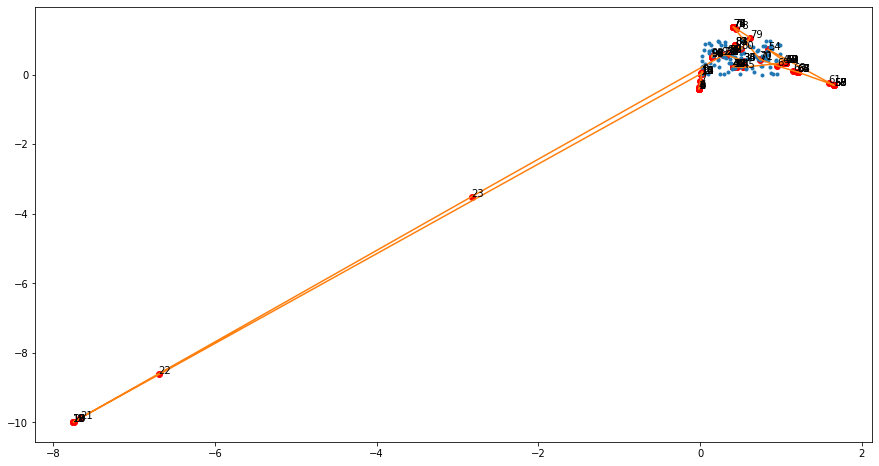

0    0.205762
1    0.674153
Name: 96, dtype: float64
92


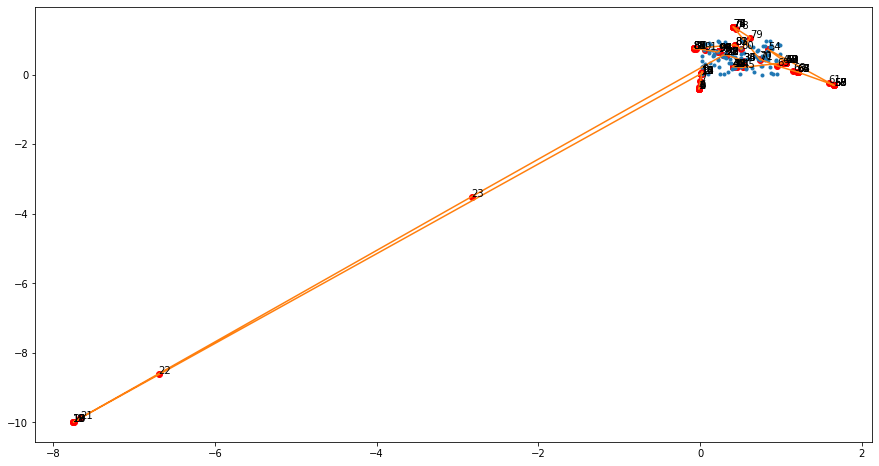

In [65]:
SOM5(data5,nueron_lst5)

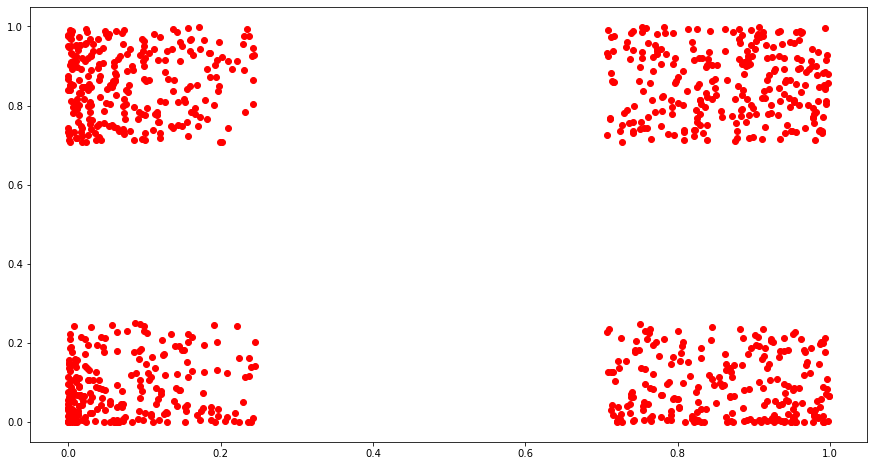

In [35]:
data5=pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randX<=0.5:
        randX=randX**2
    else:
        randX=randX**0.5
    if randY<=0.5:
        randY=randY**2
    else:
        randY=randY**0.5
    data5[i] = [randX, randY]
data5=data5.T
X=[]
Y=[]
for index,row in data5.iterrows():
    X.append(row[0])
    Y.append(row[1])
figure(figsize=(15, 8))
# plt.plot(X,Y)
plt.plot(X,Y,"ro")
plt.show()